In [1]:
%matplotlib inline

This command makes sure that whatever code of matplotlib we run, its output would be provided on the notebook only.

In [2]:
# Required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In the EDA section when I run 2 codes from the same cell, then both codes output was available in the same output window. 

In [5]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [6]:
from sklearn.model_selection import train_test_split 

# Variables description 

In [7]:
path = 'C:\Personal\Carrier Path\Data_Scientist\Accumulated_content\AI\Implementation_project_pro\Various_Projects\Final Projects\Churn Prediction/'
df = pd.read_csv(path + 'Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Tenure : The total number of years the customer is with the bank 
* Balance : balance in his account before the customer closes his account or at the current year
* NumOfProducts : total number of products the customer have used of the bank 
* Existed : It is the target variable, value = 0 (customer have churned), value = 1 (customer have not churned)

### Questioning the data
* It is Data Scientist respinsibility to ensure the accuracy and reliability of the data 
* He should explore the possibility of enriching the data 
* We should know each and every assumption of the data in hand
* Before starting with the data and modelling this is the right time to ask these questions to the product team

* No date/time colum, a lot of useful features can be build using the date/time column 
* When was the data snapshot taken? there are certain customer features like : Balance, Tenure, NumOfProducts, EstimatedSalary, which would have different value across time. 
* Are all these values/features pertaining to the same single date or spread across multiple dates?
* How frequently are customer features updated?
* Will it possible to have the values of these features over a period of time as opposed to a single, snapshot date?
* Some customers who have exited still have balance in their account, or a non-zero number of products, does this mean that they have churned only from a specific product and not the entire bank? or are these snapshots of just before they churned?
* Some features like number and kind of transactions, can help us estimate the degree of activity of the customer, instead of trusting the binary variable IsActiveMember
* Customer transaction patterns can also help us ascertain whether the customer has actually churned or not. E.g. a customer might transact daily or weekly vs. a customer who transacts annually

Here the objective is to understand the data and distill the problem statement and the stated goals further. In the process, if more data/context can be obtained, that adds to the end result of the model performance  

# Data Analysis

In [ ]:
round(df.describe(),2)
round(df.describe(include = ['O']),2)

**Analysis points**
* Since "count = 10000" for all the variables, it suggests that there is no null values in the dataset. 
* By looking at the key summary statistics we can understand the distribution of various variables

**Learning**
* 'df.describe(include = ['O'])':  This code derive the summary statistics of categorical variables (whose data type is 'O')
* 'df.describe()' : This code derive the summary statistics of all the numerical variables

### Understanding of variable 'Geography' 

In [ ]:
df['Geography'].unique()
# This data belongs to 3 countries

In [ ]:
# Frequency distribution 
df.Geography.value_counts()

In [ ]:
# Relative frequency  
df.Geography.value_counts(normalize = True)

In [ ]:
# Here we transformed the dataframe
# Another way to look at the data
df.head(10).T

### Understanding variable 'Customer_ID' 

In [ ]:
# checking the total number of unique customers in the dataset 
df['CustomerId'].nunique() # unique customer Id's
df.shape[0] # total number of customer ID's
# As both are same => the customer ID is unique

### Understanding variable 'Surname' 

In [ ]:
df['Surname'].nunique()
# 2932 distinct surname

In [ ]:
# Distribution of the target variable 'Exited' based on 'Surname'
df_t = df.groupby(['Surname']).agg({'RowNumber':'count' ,'Exited': 'mean' }).reset_index().sort_values(by ='RowNumber', ascending = False)

In [ ]:
df_t.head()

**Dropping 'CustomerId' and 'RowNumber' as they doesn't add any information**

In [8]:
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_features = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
y = df[target_var]
type(y)

In [9]:
# we have created the numpy array for the target variable
y = df[target_var].values
type(y)

numpy.ndarray

In [10]:
# removed the non-essential columns 
df.drop(cols_to_remove  , axis = 1, inplace = True)

In [ ]:
# checking whether those 2 variables have removed
df.head()

# Separating out train-test-valid sets 
* Since this is the only data available to us, we keep aside a holdout/test set to evaluate our model at the very end in order to estimate our chosen model's performance on unseen data / new data
* A validation set is also created which would be used in our baseline models to evaluate and tune our models 

In [11]:
# First we kept aside 10% of the data as test set 
df_train_val, df_test , y_train_val, y_test = train_test_split(df , y.ravel(), test_size = 0.1, random_state = 42) 

In [ ]:
# df_train_val, df_test , y_train_val, y_test = train_test_split(df , y, test_size = 0.1, random_state = 42) 

In [ ]:
y_train_val.shape

**Question: Why we need to put y.ravel() into 'train_test_split' instead of just 'y'?**
***
This depends on in what shape we need y_train_val & y_test. If we needs them in terms of 1-D array, then we must use ravel(), but if we need that in the original form i.e. 2-D then we should not use ravel() 

In [ ]:
# Here 'df' is the dataframe & 'y' is the numpy array. Hence after the split the df_train_val would be dataframe & y_train_val would be numpy array  
type(df_train_val), type(y_train_val)

Here we can notice that 'y' was an array hence the resulting 'y_train_val & y_test' are arrays as well. Whereas df was the dataframe and the resulting df_train_val & df_test are dataframes as well

In [ ]:
type(y), type(y.ravel())

In [ ]:
y.shape, y.ravel().shape

In [12]:
# Now we split the val set, 88% of that is kept aside as the training data and remaoning 12% is kept aside as the validation data 
df_train , df_val, y_train, y_val  = train_test_split(df_train_val,y_train_val , test_size = 0.12 , random_state = 42 ) 

In [13]:
df_train.shape , df_val.shape , df_test.shape
y_train.shape , y_val.shape, y_test.shape
y_train.mean() , y_val.mean(), y_test.mean()
# churn rate is almost the same across the 3 datasets

((7920, 12), (1080, 12), (1000, 12))

((7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

the choice of percentage of test data depends on the size of the overall data we have. Suppose that we have 1,000,000 observations. In that case just 1% is sufficient as it would be equals to 10,000 observations. Whereas if the data size is small in that case higher percentage of the test data would be a good choice. 

Index values changes after the splits.

# Data analysis of the training data 

### Univariate plots of numerical variables in the training set 
* For the categorical variables we have get sufficient information using the command df.describe(include = ['0']). 
* Although we have acquired information about the numerical variables as well. But univariate analysis can provide some additional insides about the numerical features of the dataset.

### Variable : Credit Score

In [ ]:
sns.set(style = 'whitegrid')
sns.boxplot(y = df_train['CreditScore'])

In [ ]:
df_train[df_train['CreditScore']<400]

* Majority have their credit score lies between 580 to 720. And around 12 are outliers whose credit score is lesser than 400 
* Also these respondents have credit score which is outside the range of 1.5*IQR (inter quartile range)

### Variable: Age 

In [ ]:
sns.boxplot(y = df_train['Age'])

In [ ]:
sns.violinplot(y = df_train['Age'])

There are many respondents in the outlier range

In [ ]:
df_train[df_train['Age'] > 85].shape , df_train[df_train['Age'] > 60].shape

* Majority have age between 32 to 45 
* 2 respondents have age more than 85 and 378 respondents have age more than 60

### Variable : Tenure 

In [ ]:
sns.violinplot(y = df_train['Tenure'])

In [ ]:
sns.boxplot(y = df_train['Tenure'])

* Here we can notice that data is kind of identically distributed across different level of tenures. 

### Variable: Balance 

In [ ]:
sns.violinplot(y = df_train['Balance'])

In [ ]:
sns.boxplot(y = df_train['Balance'])

* Significant number of respondents have 0 as a balance
* It is bimodal distribution
* It is normally distributed around 120,000 
* There are not outliers

### Variable : Number of products 

In [ ]:
sns.set(style = 'ticks')
sns.distplot(df_train['NumOfProducts'] , hist = True , kde = False)

In [ ]:
df_train['NumOfProducts'].value_counts(normalize = True)

More than 96% of the respondents have 1 or 2 products only & a small fraction have 3 or 4 products. 

### Variable : Estimated Salary 

In [ ]:
sns.kdeplot(df_train['EstimatedSalary'] )

* In the diagram above we can see that there is no significant variation of estimated salary. And the variable is identically distributed 

**Results**
1. From the univariate plot, we get an indication that 'EstimatedSalary, being uniformly distributed , might not turn out to be an important predictor
2. Similarly, for NumOfProducts , there are predominantly only two values (1 and 2). Hence, its chances of being a strong predictor is also very unlikely
3. On the other hand, Balance has a multi-modal distribution. We'll see a little later if that helps in separation of the two target classes

**Basically there are 2 types of variables which are not important for the model**
1. A categorical variable which have so many categories like customer ID & Row number
2. Uniformly distributed variables 

**Problem: I couldn't understand these results**

### Outliers

* Outliers can either be **logically improbable (as per the feature definition) (e.g negative wage rate)** or just an **extreme value as compared to the feature distribution (e.g. most of the age values are between  21- 50 but few observations have value more than 90)** 
* For the numerical variables, it can be observed from univarate plots
* For categorical variable we can see which category have extremely low percentage of values and that particular category can be termed as the outlier

* As part of outlier treatment, the particular row containing the outlier can be removed from the training set, provided they do not form a significant chunk of the dataset (< 0.5-1%)
* In cases where the value of outlier is logically faulty, e.g. negative Age or CreditScore > 900, the particular record can be replaced with mean of the feature or the nearest among min/max logical value of the feature

* Outliers in numerical features can be of a very high/low value, lying in the top 1% or bottom 1% of the distribution or values which are not possible as per the feature definition.
* Outliers in categorical features are usually levels with a very low frequency/no. of samples as compared to other categorical levels

**Problems : Why here outlier treatment is not required?**
***
1. The categorical variable 'NumOfProducts' have 2 categories which have less than 1% frequency - It seems to have outliers 
2. 'Age' variable seems to have outliers  

# Data preprocessing 

### Missing value treatment

In [ ]:
# There is no missing value in any variable
df_train.isnull().sum()

No missing value present in this dataset. The missing values can also be observed from the df.describe() commands. However, most real world dataset might have missing values, a couple of things can be done in those cases: 
1. If the column or feature has too many missing values (around 30- 35%), it can be dropped as it might not add much relevance to the data 
2. If there are a few missing values, the column/feature can be imputed with its summary statistics (mean/median/mode) or numbers like 0/1 etc. which add value depending on the context and the data.  
3. For a categorical variable which have many missing values we can introduce another category

Suppose there is a categorical variable called 'HasCrCard', here to inpute for the missing values we can also introduce another category 

### Hypothetical scenaro: What if there is missing values and how do we treat them? 

In [ ]:
# making all the changes in the temporary dataframe
df_missing = df_train.copy()

In [ ]:
# introducing 10% nulls in Age 
# Here we only randomly selected the index of the data based on which we will later extract the random sample out of the data
na_index = df_missing.sample(frac = 0.1).index

In [ ]:
na_index.shape

In [ ]:
df_missing.loc[na_index , 'Age'] = np.NaN

In [ ]:
# Introducing 30% null in geography 
na_index = df_missing.sample(frac= 0.3).index
df_missing.loc[na_index , 'Geography'] = np.NaN

In [ ]:
# Introducing 5% null in HasCreditCard
na_index = df_missing.sample(frac = 0.05).index 
df_missing.loc[na_index , 'HasCrCard'] = np.NaN

In [ ]:
df_missing.isnull().sum() / df_missing.shape[0]

#### Null value treatment for 'Age' 

In [ ]:
df_missing['Age'].mean() , df_train['Age'].mean()

In [ ]:
# Took the mean value of the variable
age_mean = df_missing['Age'].mean()

In [ ]:
# Distrinution of 'Age' before the missing values
sns.distplot(df_missing['Age'])

In [ ]:
# Distribution of 'Age' in the original dataset 
sns.distplot(df_train['Age'])

**Approach 1 : fill all the null values with the 'age_mean'**

In [ ]:
df_missing['Age'].fillna(age_mean, inplace = True)

In [ ]:
# After the missing value imputation the mean value for Age have reduced. 
df_missing['Age'].mean()

In [ ]:
sns.distplot(df_missing['Age'])

The approach 1 of missing value imputation made the distribution 'Age' quite skewed. As more frequency is at the mean value

**Approach 2 : random imputation of the missing values**

In [ ]:
# An alternate wayt to impute values for 'Age'
df_missing['Age'] = df_missing['Age'].apply(lambda x : int(np.random.normal(age_mean, 3)) if np.isnan(x) else x)

In [ ]:
# this is generating a random number from the normal distribution with mean 'age_mean' and standard deviation = 3
np.random.normal(age_mean, 3)

In [ ]:
# After the missing value imputation the mean value for Age have reduced. 
df_missing['Age'].mean()

In [ ]:
sns.distplot(df_missing['Age'])

Comparing to the approach_2, the missing value imputation lesser affected the distribution of 'Age' 

**The key idea is that the missing value imputation should be done in a manner that the distribution of the variable is unaffected** 

#### Null value treatment for Geography  & Has Credit Card

If we impute all the null values of the Geography with either of the category, then that would lead to a significant change in the distribution of the variable (especially when the missing values are large) => hence we will have to introduce a new category.  

In [ ]:
# Filling nulls in Geography (categorical feature with a high %age of missing values)
geog_fill_value = 'UNK'
df_missing['Geography'].fillna(geog_fill_value , inplace = True)

In [ ]:
df_missing['Geography'].value_counts(normalize = True)

In [ ]:
# Filling nulls in HasCrCard (boolean feature) - 0 for few nulls (generally less than 5%), -1 for lots of nulls
df_missing['HasCrCard'].fillna(0 , inplace = True)

In [ ]:
df_missing.isnull().sum() / df_missing.shape[0]

### Encoding 

#### Categorical variable encoding

Almost all the ML algorithhms requires the data in the form of numbers

As a rule of thumb, we can consider using :
1. Label Encoding ---> Binary categorical variables (like Gender) and Ordinal variables (like various levels)
2. One-Hot Encoding ---> Non-ordinal categorical variables with low to mid cardinality (< 5-10 levels)
3. Target encoding ---> Categorical variables with > 10 levels

**Plan for encoding**
* HasCrCard and IsActiveMember are already label encoded
* For Gender, a simple Label encoding should be fine.
* For Geography, since there are 3 levels, OneHotEncoding should do the trick
* For Surname, we'll try Target/Frequency Encoding

#### Label Encoding 

**Approach 1 : Non sklearn method**

In [ ]:
df_train.head()

In [ ]:
# through this 'Male' label is converted into 1 and female label is converted into 0 
df_train['Gender_Cat'] = df_train['Gender'].astype('category').cat.codes

In [ ]:
df_train.head()

In [ ]:
df_train.drop('Gender_Cat' , axis =1 , inplace = True)

**Approach 2 : Sklearn method**

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

We fit (fittiing the label encoder) only on train dataset as that's the only data we'll assume we have. We'll treat validation and test sets as unseen data. Hence, they can't be used for fitting the encoders.
***
But the trained encoder with the training data would be used to transform the validation data and the test data

In [16]:
df_train['Gender'] = le.fit_transform(df_train['Gender'])

fit_transform is the combination of 2 things: 
1. 'fit' : it learns the mapping in the data passed (which is the gender column)
2. 'transform' : it implement that mapping

In [ ]:
# here we can see that 'le' learned 2 classes
le.classes_

In [ ]:
# Here we can see that what king of mapping it have learned
le.transform(le.classes_)

In [17]:
le_name_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

In [ ]:
type(le_name_mapping)

In [ ]:
le_name_mapping

In [ ]:
# Problem: why we needed double square bracket 
le.transform([['Male']])

In [ ]:
# What if Gender column has new values in test or val set?
# le.transform([['ABC']])
# It gives an error 

In [ ]:
pd.Series(['ABC'])

In [ ]:
# Using this methiod if value belongs to any category they would be assigned respective value otherwise NaN would be assigned
pd.Series(['ABC']).map(le_name_mapping)
pd.Series(['Male']).map(le_name_mapping)
pd.Series(['Female']).map(le_name_mapping)

In [18]:
# Encoding Gender feature for validation set and test set
df_val['Gender'] = df_val['Gender'].map(le_name_mapping)
df_test['Gender'] = df_test['Gender'].map(le_name_mapping)

In [ ]:
df_val['Gender'].isnull().sum()
df_test['Gender'].isnull().sum()

In [ ]:
# filling missing/NaN values created due to new categorical levels 
# Although there is no null value for the variable in the test and the validation data, but still we inpute them to understand the process
df_val['Gender'].fillna(-1 , inplace = True)
df_test['Gender'].fillna(-1 , inplace = True)

#### One Hot Encoding 

**Approach 1 : Non Sklearn method**

In [ ]:
df_train.head()

In [ ]:
# Here we are using a pandas function called 'get_dummies'
t = pd.get_dummies(df_train , prefix_sep = '_', columns = ['Geography'])

In [ ]:
t.head()

In [ ]:
dummies = ['Geography_France', 'Geography_Germany', 'Geography_Spain']

In [ ]:
# converting boolian values into integers
t[dummies] = t[dummies].astype(int)

In [ ]:
t.head()

In [ ]:
# For dummies if there are 3 N categories then we need to create N-1 dummies for them. Using this logic we will drop 'Geography_France' 
t.drop(['Geography_France'] , axis =1 , inplace = True)

Here we need to be mindful before dropping any dummies because there can be a scenario for any other class which is not France. But since other dummies are taking value as 0, which suggests that that entry belongs to France and which is wrong.  

In [ ]:
t.head()

**Approach 2 : Using sklearn methiod**

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [20]:
le_ohe = LabelEncoder()
ohe    = OneHotEncoder(handle_unknown = 'ignore' , sparse = False) 

**handle_unknown = 'ignore'** 
* After training of the one hot encoder. If we transform the test data using this and in that phase if it came across any unknown category then it will assign 0 value to that. 
***
**sparse = False**


In [ ]:
# this is an array / row vector (of 1D)
# le_ohe.fit_transform(df_train['Geography'])
# pd.Series(le_ohe.fit_transform(df_train['Geography'])).unique()
# le_ohe.fit_transform(df_train['Geography']).shape

In [21]:
# We converted the 1D raw vector into 2D column vector 
enc_train = le_ohe.fit_transform(df_train['Geography']).reshape(df_train.shape[0] , 1)
enc_train.shape
# This vector is an input to the OneHotEncoder

(7920, 1)

**Interestingly here we have first implemented label encoder and then implemented one hot encoder**

In [ ]:
enc_train[0:2]

In [22]:
# ohe accepts only 2-D array 
ohe_train = ohe.fit_transform(enc_train)

In [ ]:
ohe_train
ohe_train.shape

In [23]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_ , le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [24]:
# Encoding Geography feature for validation and test set
enc_val = df_val['Geography'].map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = df_test['Geography'].map(le_ohe_name_mapping).ravel().reshape(-1,1)

In [ ]:
# Filling missing/NaN values created due to new categorical levels
enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999
# This is how we will impute null values in the ndarray 

In [ ]:
np.unique(enc_val) , np.unique(enc_test)

In [27]:
ohe_val = ohe.transform(enc_val)

In [28]:
ohe_test = ohe.transform(enc_test)

In [ ]:
# Show what happens when a new value is inputted into the OHE 
ohe.transform(np.array([[0]]))
ohe.transform(np.array([[1]]))
ohe.transform(np.array([[2]]))
ohe.transform(np.array([[3]]))

In [ ]:
# 2D arrays are the input to the ohe_transform function that is why we are providing array in this way only 
np.array([[0]]).shape

**Adding the one-hot encoded columns to the dataframe and removing the original feature**

In [25]:
cols = ['country_' + str(x) for x in le_ohe.classes_ ]
cols

['country_France', 'country_Germany', 'country_Spain']

In [ ]:
df_train.head()

In [29]:
df_train1 = pd.concat([df_train.reset_index().drop( ['index'] , axis = 1) , pd.DataFrame(ohe_train, columns = cols) ], axis =1)
df_test1  = pd.concat([df_test.reset_index().drop(['index'] , axis =1) , pd.DataFrame(ohe_test ,columns = cols)] , axis =1)
df_val1   = pd.concat([df_val.reset_index().drop(['index'] , axis =1) , pd.DataFrame(ohe_val, columns = cols)] , axis =1)

In [30]:
# drop the geography column 
df_train1.drop(['Geography'] , axis =1 , inplace = True)
df_test1.drop(['Geography'] , axis =1 , inplace = True)
df_val1.drop(['Geography'] , axis =1 , inplace = True)

In [31]:
print("Training Set")
df_train1.head()
print("\n\nValidation Set")
df_val1.head()
print("\n\nTest Set")
df_test1.head()

Training Set


,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0




Validation Set


,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Sun,757,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0
1,Russo,552,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0
2,Munro,619,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0
3,Perkins,633,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
4,Aliyeva,698,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0




Test Set


,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [ ]:
# ohe.fit_transform(df_train['Geography'])

Basically the OneHotEncoder takes 2D array as an imput. That is why we have created a 2D array. Using that it would implement the OneHotEncoding 

#### Target encoding 

* Target encoding is generally useful when dealing with categorical variables of high cardinality (high number of levels).

In [36]:
# This is the dataset after applying both the label encoding and the one hot encoding

df_train1.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333


In [32]:
means = df_train1.groupby(['Surname']).Exited.mean()
means.head()
type(means)
means.shape

Surname
Abazu       0.00
Abbie       0.00
Abbott      0.25
Abdullah    1.00
Abdulov     0.00
Name: Exited, dtype: float64

pandas.core.series.Series

(2610,)

In [33]:
global_mean = y_train.mean()
global_mean

0.20303030303030303

In [34]:
# creating new encoded features for surname - Target (mean) encoding 
df_train1['Surname_mean_churn'] = df_train1['Surname'].map(means)
df_train1['Surname_mean_churn'].fillna(global_mean , inplace = True)

In [38]:
df_train1.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333


In [35]:
# Calculate frequency for each category 
freqs = df_train1.groupby(['Surname']).size()

In [37]:
freqs.sort_values(ascending = False).head(10)

Surname
Smith      24
Brown      22
Yeh        22
Martin     21
Wright     21
Shih       21
Fanucci    20
Lu         20
Walker     20
Johnson    20
dtype: int64

In [39]:
# Create frequency encoding - number of instances each category in the data 
df_train1['Surname_freq'] = df_train1.Surname.map(freqs)
df_train1['Surname_freq'].fillna(0 , inplace = True)

**Leave one out target encoding**

Mean for a category, __m<sub>c</sub> = S<sub>c</sub> / n<sub>c</sub>__    .....   (1)

What we need to find is the mean excluding a single sample. This can be expressed as : __m<sub>i</sub> = (S<sub>c</sub> - t<sub>i</sub>) / (n<sub>c</sub> - 1)__     .....   (2)

Using (1) and (2), we can get : __m<sub>i</sub> = (n<sub>c</sub>m<sub>c</sub> - t<sub>i</sub>) / (n<sub>c</sub> - 1)__

Here, _S<sub>c</sub>_ = Sum of target variable for category c

_n<sub>c</sub>_ = Number of rows in category c   

_t<sub>i</sub>_ = Target value of the row whose encoding is being calculated

In [41]:
# create leave-one-out target encoding for Surname
df_train1['Surname_enc'] = ((df_train1['Surname_mean_churn']*df_train1['Surname_freq']) - df_train1['Exited']) / (df_train1['Surname_freq'] -1)

In [42]:
# Fill NaN occuring due to category frequency being 1 or less
df_train1['Surname_enc'].fillna(  ((df_train1.shape[0]*global_mean) - df_train1['Exited']) / (df_train1.shape[0] - 1) , inplace = True)

On validation and test set, we'll apply the normal Target encoding mapping as obtained from the training set. Because models would not use these datasets for learning. Hence target leakage issue would not arise 

In [43]:
df_val1['Surname_enc'] = df_val1['Surname'].map(means)
df_val1['Surname_enc'].fillna(global_mean , inplace = True)

In [44]:
df_test1['Surname_enc'] = df_test1['Surname'].map(means)
df_test1['Surname_enc'].fillna(global_mean , inplace = True)

In [45]:
# checking whether leave-one-out target encoding does its job
df_train1[['Surname_mean_churn','Surname_enc','Exited' ]].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.54823,0.562677
Surname_enc,0.548230,1.00000,-0.026440
Exited,0.562677,-0.02644,1.000000


In the above correlation metrix we can see that when we were not using the leave one out target variable encoding, then the correction between the encoded values and the target value was huge. But that correlation have reduced significantly when we used LOO encoding

In [46]:
# deleting the redundent columns from the respective datasets
df_train1.drop(['Surname_freq'] , axis =1 , inplace = True)
df_train1.drop(['Surname_mean_churn'] , axis =1 , inplace = True)
df_train1.drop(['Surname'] , axis =1 , inplace = True)

In [47]:
df_val1.drop(['Surname'] , axis = 1, inplace = True)

In [48]:
df_test1.drop(['Surname'], axis =1 , inplace = True)

In [49]:
df_train1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000


**Problem : As 'Tenure' looks like a categorical variable, then why we didn't did encoding of that?** 
***
Answer: Because id we have a variable with labels in non-numerical form. In that case we do encoding. But Tenure is already encoded variable 

# Bivariate Analysis 

In [50]:
# linear correlation between the individual features and the target variable 
corr = df_train1.corr()
round(corr,2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
CreditScore,1.00,0.00,0.00,0.01,-0.00,0.01,-0.01,0.04,0.00,-0.03,-0.01,0.00,0.01,-0.00
Gender,0.00,1.00,-0.02,0.01,0.01,-0.03,0.01,0.03,-0.01,-0.10,0.00,-0.02,0.02,0.01
Age,0.00,-0.02,1.00,-0.01,0.03,-0.03,-0.02,0.09,-0.01,0.29,-0.04,0.05,-0.00,-0.01
Tenure,0.01,0.01,-0.01,1.00,-0.01,0.02,0.03,-0.02,0.01,-0.01,0.00,-0.00,0.00,-0.01
Balance,-0.00,0.01,0.03,-0.01,1.00,-0.30,-0.02,-0.01,0.03,0.11,-0.23,0.41,-0.14,0.01
NumOfProducts,0.01,-0.03,-0.03,0.02,-0.30,1.00,0.01,0.01,0.01,-0.04,0.00,-0.02,0.01,-0.00
HasCrCard,-0.01,0.01,-0.02,0.03,-0.02,0.01,1.00,-0.01,-0.01,-0.01,0.01,0.01,-0.01,-0.00
IsActiveMember,0.04,0.03,0.09,-0.02,-0.01,0.01,-0.01,1.00,-0.02,-0.15,0.00,-0.02,0.02,0.00
EstimatedSalary,0.00,-0.01,-0.01,0.01,0.03,0.01,-0.01,-0.02,1.00,0.02,-0.00,0.01,-0.01,-0.01
Exited,-0.03,-0.10,0.29,-0.01,0.11,-0.04,-0.01,-0.15,0.02,1.00,-0.11,0.17,-0.05,-0.03


This is carl pearson correlation which can only tell about the linear correlation. For the non linear correlation this would not say anything

<Axes: >

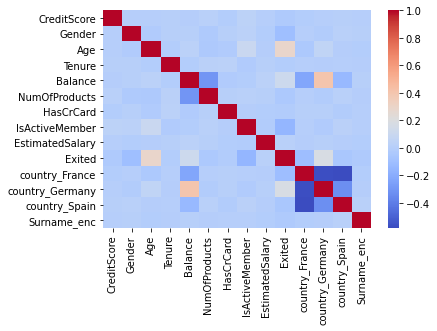

In [51]:
sns.heatmap(corr, cmap = 'coolwarm')

Here we can notice that features are less correlated with the target variable, that derives the need for feature engeenering 

**Individual features vs their distribution across target variable values**

<Axes: xlabel='Exited', ylabel='Age'>

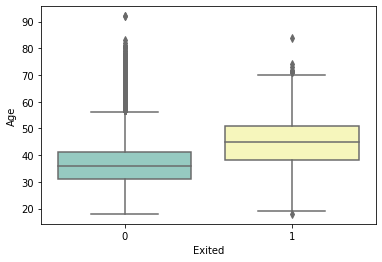

In [52]:
sns.boxplot(x = "Exited" , y = 'Age' , data = df_train1, palette = "Set3" )

* most people who churns lies in the age interval of 30-40 , whereas who didn't churned lies in the interval 38 -50 


<Axes: xlabel='Exited', ylabel='Balance'>

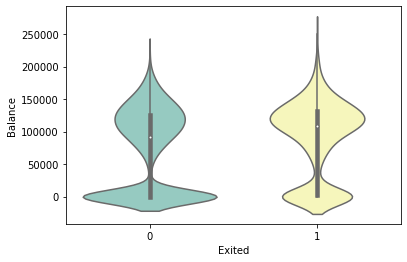

In [53]:
sns.violinplot(x = 'Exited' , y = 'Balance' , data = df_train1 , palette= 'Set3')

Here we can see the peaks of both the diagram. We can notice that among the group of people who churns, most of them have 0 balance (larger peak at 0 balance). Whereas among the group of people who do not churns most of them have higher balance. 

* For categorical variables we will check the mean difference across classes.
* If for a categorical variable there is sigificant gape across classes, then that variable would be useful in model training 

In [54]:
cat_var_bv = ['Gender' ,'IsActiveMember','country_France',  'country_Germany' ]

for col in cat_var_bv:
    df_train1.groupby([col]).Exited.mean()

Gender
0    0.248191
1    0.165511
Name: Exited, dtype: float64

IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64

country_France
0.0    0.245877
1.0    0.160593
Name: Exited, dtype: float64

country_Germany
0.0    0.163091
1.0    0.324974
Name: Exited, dtype: float64

In [55]:
col = 'NumOfProducts'
df_train1.groupby([col]).Exited.mean()
df_train1[col].value_counts()

NumOfProducts
1    0.273428
2    0.076881
3    0.825112
4    1.000000
Name: Exited, dtype: float64

NumOfProducts
1    4023
2    3629
3     223
4      45
Name: count, dtype: int64

Here we can notice that among the classes 1 & 2 where frequency is almost same. The mean churn is way higher for class 1 then class 2. Which means that relative to customers with 2 products, customers with 1 products are high likely to churn.   

# Some basic feature engeenering

In [56]:
df_train1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc'],
      dtype='object')

**Creating some new features based on simple interaction between the existing variables**
1. 'Balance'/ 'NumOfProducts' : balace per product
2. 'Balance'/ 'EstimatedSalary' : balance per dollar of salary 
3. 'Tenure' / 'Age' 
4.  Age*'Surname_enc'

In [57]:
eps = 1e-6 # it is equivalent to 0.000001

df_train1['balance_per_product'] = df_train1['Balance'] / ( df_train1[ 'NumOfProducts'] + eps)
df_train1['bal_by_est_salary'] = df_train1['Balance'] / ( df_train1[ 'EstimatedSalary'] + eps)
df_train1['tenure_age_ratio'] = df_train1['Tenure']/ (df_train1['Age'] + eps)
df_train1['age_surname_mean_churn'] = np.sqrt(df_train1['Age'])*df_train1['Surname_enc']

In [58]:
new_cols = ['balance_per_product', 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']

In [59]:
# ensure that the new columns doesn't have any missing values
df_train1[new_cols].isnull().sum()

balance_per_product       0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

In [60]:
df_train1[new_cols + ['Exited']].corr()

,balance_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,Exited
balance_per_product,1.000000,0.111846,-0.027220,0.009491,0.100574
bal_by_est_salary,0.111846,1.000000,0.010302,0.006520,0.029653
tenure_age_ratio,-0.027220,0.010302,1.000000,-0.054354,-0.121313
age_surname_mean_churn,0.009491,0.006520,-0.054354,1.000000,0.013585
Exited,0.100574,0.029653,-0.121313,0.013585,1.000000


In [61]:
df_train1.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,balance_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
CreditScore,1.000000,0.000354,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117,-0.009481,0.003393,0.007561,-0.000739,-0.006963,-0.001205,0.005658,-0.000542
Gender,0.000354,1.000000,-0.024446,0.010749,0.009380,-0.026795,0.007550,0.028094,-0.011007,-0.102331,0.000823,-0.018412,0.017361,0.008002,0.018441,0.010152,0.016507,0.004545
Age,0.002099,-0.024446,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221,-0.038881,0.048764,-0.003648,-0.010844,0.032505,0.004223,-0.379150,0.130921
Tenure,0.005994,0.010749,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660,0.000021,-0.003131,0.003090,-0.006753,-0.014693,0.019621,0.888725,-0.009280
Balance,-0.001507,0.009380,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377,-0.231770,0.405616,-0.136044,0.006925,0.902243,0.119801,-0.025377,0.011462
NumOfProducts,0.014110,-0.026795,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200,0.002991,-0.015926,0.012388,-0.002020,-0.594547,-0.047626,0.027579,-0.006663
HasCrCard,-0.011868,0.007550,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659,0.005881,0.008197,-0.014934,-0.000551,-0.022900,-0.007785,0.031203,-0.003680
IsActiveMember,0.035057,0.028094,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477,0.002126,-0.020570,0.018003,0.004902,-0.012211,-0.007154,-0.040505,0.017431
EstimatedSalary,0.000358,-0.011007,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881,-0.004512,0.010583,-0.005320,-0.009899,0.017881,-0.192552,0.013272,-0.009621
Exited,-0.028117,-0.102331,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000,-0.106006,0.173492,-0.050264,-0.026440,0.100574,0.029653,-0.121313,0.013585


<Axes: >

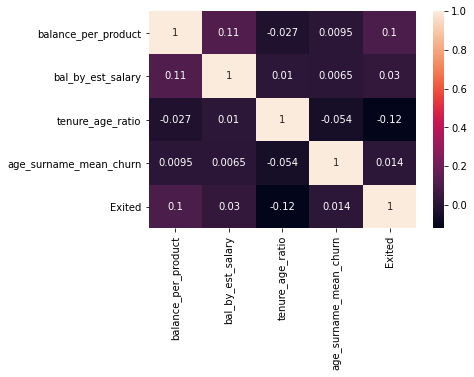

In [62]:
sns.heatmap(df_train1[new_cols + ['Exited']].corr() , annot = True)

Hence in terms of linear association terms these new varaibles are not correlated with the target variable. But it is possible that there is non-linear association might exists. Anyways, we will add these variables in the test and the validation dataset as well

In [63]:
eps = 1e-6 

df_val1['balance_per_product'] = df_val1['Balance'] / ( df_val1[ 'NumOfProducts'] + eps)
df_val1['bal_by_est_salary'] = df_val1['Balance'] / ( df_val1[ 'EstimatedSalary'] + eps)
df_val1['tenure_age_ratio'] = df_val1['Tenure']/ (df_val1['Age'] + eps)
df_val1['age_surname_mean_churn'] = np.sqrt(df_val1['Age'])*df_val1['Surname_enc']

In [64]:
eps = 1e-6 

df_test1['balance_per_product'] = df_test1['Balance'] / ( df_test1[ 'NumOfProducts'] + eps)
df_test1['bal_by_est_salary'] = df_test1['Balance'] / ( df_test1[ 'EstimatedSalary'] + eps)
df_test1['tenure_age_ratio'] = df_test1['Tenure']/ (df_test1['Age'] + eps)
df_test1['age_surname_mean_churn'] = np.sqrt(df_test1['Age'])*df_test1['Surname_enc']

# Feature scaling and normalization

* Various feature scaling methiods: 
1. Feature Transformation : Using Log, Log 10, sqrt, pow
2. MinMaxScaler : Brings all feature values between 0 and 1 , formula = (value - Min) / (Max - Min)
3. StandardScaler : Mean Normalization, here feature values are an estimate of their Z score 

**Problem: Feature scaling is not required in case of ensemble/ tree based models. But in case of logistic regression & SVM, it is required. Try to understand why it is the case**

**Feature transformation**

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

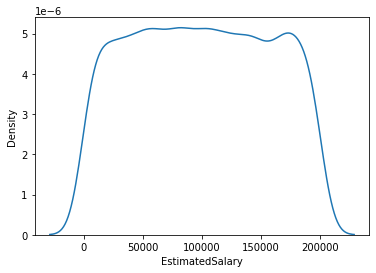

In [65]:
sns.distplot(df_train1['EstimatedSalary'] , hist = False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

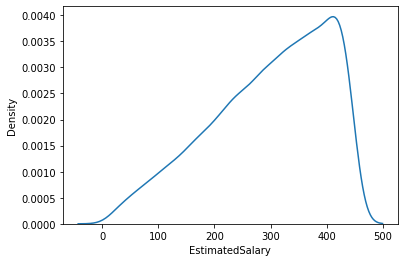

In [66]:
sns.distplot(np.sqrt(df_train1['EstimatedSalary']) , hist = False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

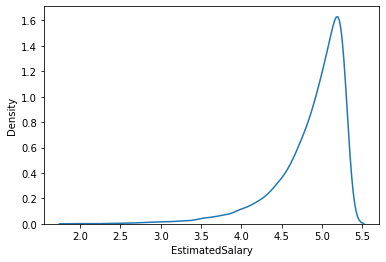

In [67]:
sns.distplot(np.log10(1 +df_train1['EstimatedSalary']) , hist = False)

**Standard Scaler**

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [69]:
df_train1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'balance_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [70]:
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary','Surname_enc', 'balance_per_product', 'bal_by_est_salary',
             'tenure_age_ratio','age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain' ]

It seems like the objective of standard scaling is to bring values of all variables between 0 to 1. That is why for the binary variables which have values 0 & 1 are not being scaled and others are scaled.

In [71]:
# Scaling only continous variables
cols_to_scale = cont_vars

In [72]:
sc_X_train = sc.fit_transform(df_train1[cols_to_scale])

* Here the object 'sc' is learning the 'mean' and 's.d' value for each variables.
* Here fit learns the data and calculates the mean and standard deviations, and transform implement that to the variable.

In [73]:
# Mapping learnt on the continous features
sc_map = {'mean' : sc.mean_ , 'std' : np.sqrt(sc.var_)}

In [74]:
sc_map

{'mean': array([6.50542424e+02, 3.88912879e+01, 5.01376263e+00, 7.60258447e+04,
        1.53156566e+00, 9.96616540e+04, 2.04321788e-01, 6.24727199e+04,
        2.64665647e+00, 1.38117689e-01, 1.26136416e+00]),
 'std': array([9.64231806e+01, 1.05374237e+01, 2.88940724e+00, 6.23738902e+04,
        5.82587032e-01, 5.74167173e+04, 1.89325378e-01, 5.67456646e+04,
        1.69816787e+01, 8.95590667e-02, 1.18715858e+00])}

In [75]:
sc_X_train
sc_X_train.shape

array([[ 0.28476115, -0.27438281, -1.38913012, ...,  0.09544769,
        -1.23203509, -1.06250688],
       [-0.38935061, -1.12848152, -0.00476313, ..., -0.11883413,
         0.52554689, -1.06250688],
       [-0.23378636,  0.57971591,  1.37960386, ..., -0.15585364,
         0.6909664 ,  0.19319056],
       ...,
       [-1.20865567, -0.27438281, -0.35085488, ...,  0.03900484,
        -0.3015505 , -1.06250688],
       [-1.05309142,  1.43381462, -0.00476313, ...,  1.93193961,
        -0.50832484,  2.6514717 ],
       [ 1.06258241, -0.84378195, -1.38913012, ..., -0.04313269,
        -1.17000278, -1.06250688]])

(7920, 11)

In [76]:
sc_X_train = pd.DataFrame(sc_X_train , columns = cols_to_scale)

In [77]:
sc_X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,balance_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [78]:
# Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(df_val1[cols_to_scale])
sc_X_test = sc.transform(df_test1[cols_to_scale])

In [79]:
sc_X_val  = pd.DataFrame(sc_X_val , columns = cols_to_scale)
sc_X_test = pd.DataFrame(sc_X_test , columns = cols_to_scale)

# Feature Selection - RFE (recursive feature elimination)

* When we have a lot of features in the dataset, then it is important to select the important features and train the model on those features only. 
* There can be a scenario where we have 1000 features, and out of them 50 are the most important features which can explain the entire variance in the target variable. But choosing those 50 features is a very skillful task.
* PCA is also used for this purpose

In [80]:
from sklearn.feature_selection  import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

* Selection of features based on the LogisticRegression (linear model)
* Selection of features based on the DecisionTree (Non linear model) 
* We will keep both set of features, one set would be used when we will train the linear model and other set would be used when we will be training the non linear models 

In [81]:
# variables we have
cont_vars
cat_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'balance_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [82]:
# RFE algorithm takes numpy arrays as input
y = df_train1['Exited'].values

**Important feature selection for linear model: Logistic Regression** 

In [83]:
# For the logistic regression we are using the scaled continous variable because it is required for the model 
X_scaled = pd.concat([df_train1[cat_vars], sc_X_train[cont_vars] ], ignore_index = True  , axis =1)
# This 'ignore_index = True' makes sure that we do not have column variables in the resulting dataframe

In [85]:
X_scaled.columns = cat_vars + cont_vars
# be careful about the order of the variables

In [86]:
X_scaled.head()

,Gender,HasCrCard,IsActiveMember,country_France,country_Germany,country_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,balance_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,1,1,0,0.0,1.0,0.0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,0,1,0,1.0,0.0,0.0,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,1,1,1,1.0,0.0,0.0,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,1,1,0,1.0,0.0,0.0,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,1,1,0,1.0,0.0,0.0,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [87]:
est = LogisticRegression()
num_feature_to_select = 10 

**Here we have selected the value as 10 because in the mannual analaysis we came to know that only 10 variables are significantly correlated with the independent variable**

In [88]:
rfe = RFE(estimator = est,   n_features_to_select=num_feature_to_select )
rfe = rfe.fit(X_scaled.values, y)

In [89]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True False  True  True  True False False
  True False False  True False]
[1 3 1 1 1 1 2 1 1 1 6 5 1 7 4 1 8]


In [90]:
type(rfe.support_)

numpy.ndarray

In [91]:
mask = rfe.support_.tolist()

In [92]:
mask

[True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False]

In [93]:
selected_features = [b for a,b in zip(mask , X_scaled.columns) if a]
selected_features

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Balance',
 'Surname_enc',
 'tenure_age_ratio']

**Important feature selection for non linear model: SVM (non linear model)** 

In [94]:
X = df_train1[cat_vars + cont_vars]

In [95]:
est_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy' )
num_feature_to_select = 10 

In [96]:
rfe = RFE(estimator = est_dt,   n_features_to_select=num_feature_to_select )
rfe = rfe.fit(X.values, y)

In [97]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False  True False False  True  True
  True  True  True  True  True]
[8 7 1 6 1 5 4 1 3 2 1 1 1 1 1 1 1]


In [98]:
mask = rfe.support_.tolist()
selected_features_dt = [b for a,b in zip(mask , X.columns) if a]
selected_features_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'balance_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

# Model Building Phase

## Logistic Regression (Linear Model)

* We train the linear models on features selected through RFE

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
# Importing revevant metrics
from sklearn.metrics import roc_auc_score , f1_score, recall_score , confusion_matrix ,classification_report  

In [101]:
selected_cat_vars = [x for x in selected_features if x in cat_vars]
selected_cont_vars = [x for x in selected_features if x in cont_vars]

In [102]:
selected_cat_vars
selected_cont_vars

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

['Age', 'Tenure', 'Balance', 'Surname_enc', 'tenure_age_ratio']

In [103]:
# Using categorical features and scales numerical features
X_train = np.concatenate((df_train1[selected_cat_vars].values , sc_X_train[selected_cont_vars].values) ,axis =1)
X_val = np.concatenate((df_val1[selected_cat_vars].values , sc_X_val[selected_cont_vars]) , axis =1)
X_test = np.concatenate((df_test1[selected_cat_vars].values , sc_X_test[selected_cont_vars]) , axis =1)

In [104]:
X_train.shape , X_val.shape , X_test.shape

((7920, 10), (1080, 10), (1000, 10))

In [105]:
type(X_train)

numpy.ndarray

**Solving class imbalance**

In [106]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [107]:
num_samples = np.unique(y_train , return_counts = True)
num_samples

(array([0, 1], dtype=int64), array([6312, 1608], dtype=int64))

In [108]:
# So 'np.unique(y_train , return_counts = True)' provided 2 output
_ , num_samples1 = np.unique(y_train , return_counts = True)
num_samples1

array([6312, 1608], dtype=int64)

In [109]:
_

array([0, 1], dtype=int64)

In [111]:
zero_class_size = np.max(num_samples1)
zero_class_size

6312

In [112]:
# Each data point with target value = 1 have weight of 3.92
weights =  zero_class_size/ num_samples1
weights

array([1.        , 3.92537313])

In [113]:
weights_dict = dict()
class_labels = [0,1]
for a,b in zip(class_labels , weights):
    weights_dict[a] = b

In [114]:
weights_dict

{0: 1.0, 1: 3.925373134328358}

In [115]:
# initializing the model 
lr = LogisticRegression(C = 1.0 , penalty = 'l2' ,class_weight = weights_dict , n_jobs = -1 )

In [116]:
## Fitting model 
lr.fit(X_train , y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

In [117]:
selected_cat_vars + selected_cont_vars 

lr.coef_
lr.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Balance',
 'Surname_enc',
 'tenure_age_ratio']

array([[-0.52471305, -0.90916551, -0.28943919,  0.48601618, -0.19568074,
         0.71925277,  0.23658221,  0.1699655 , -0.06516099, -0.3177485 ]])

array([0.53069727])

In [118]:
# Training metrices 
roc_auc_score(y_train , lr.predict(X_train))
recall_score(y_train , lr.predict(X_train))
confusion_matrix(y_train, lr.predict(X_train))
print(classification_report(y_train , lr.predict(X_train)))

0.7078816941906437

0.7058457711442786

array([[4481, 1831],
       [ 473, 1135]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      6312
           1       0.38      0.71      0.50      1608

    accuracy                           0.71      7920
   macro avg       0.64      0.71      0.65      7920
weighted avg       0.80      0.71      0.73      7920



In [119]:
# Validation metrics
roc_auc_score(y_val , lr.predict(X_val))
recall_score(y_val , lr.predict(X_val))
confusion_matrix(y_val , lr.predict(X_val))
print(classification_report(y_val , lr.predict(X_val)))

0.6883620431545538

0.6890756302521008

array([[579, 263],
       [ 74, 164]], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.69      0.77       842
           1       0.38      0.69      0.49       238

    accuracy                           0.69      1080
   macro avg       0.64      0.69      0.63      1080
weighted avg       0.78      0.69      0.71      1080



## Support vector machines (Lenear model) 

In [120]:
from sklearn.svm import SVC
# SVC : Support vector classifier

In [121]:
svm = SVC(C = 1.0 , kernel = 'linear' , class_weight =weights_dict )

In [122]:
svm.fit(X_train , y_train)

SVC(class_weight={0: 1.0, 1: 3.925373134328358}, kernel='linear')

In [123]:
#Fitted model parameters 
selected_cat_vars + selected_cont_vars 

svm.coef_
svm.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Balance',
 'Surname_enc',
 'tenure_age_ratio']

array([[-0.49026285, -0.74489773, -0.24389722,  0.45313385, -0.20923663,
         0.84082618,  0.12148236,  0.15318455, -0.06350771, -0.16540271]])

array([0.41322976])

Here "Age" & "IsActiveMember" are looking like the most important features of the model.

In [124]:
# Training metrices 
roc_auc_score(y_train , svm.predict(X_train))
recall_score(y_train , svm.predict(X_train))
confusion_matrix(y_train, svm.predict(X_train))
print(classification_report(y_train , svm.predict(X_train)))

0.7158208482303312

0.7039800995024875

array([[4593, 1719],
       [ 476, 1132]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      6312
           1       0.40      0.70      0.51      1608

    accuracy                           0.72      7920
   macro avg       0.65      0.72      0.66      7920
weighted avg       0.80      0.72      0.75      7920



In [125]:
# Validation metrics
roc_auc_score(y_val , svm.predict(X_val))
recall_score(y_val , svm.predict(X_val))
confusion_matrix(y_val , svm.predict(X_val))
print(classification_report(y_val , svm.predict(X_val)))

0.696356214694904

0.6848739495798319

array([[596, 246],
       [ 75, 163]], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       842
           1       0.40      0.68      0.50       238

    accuracy                           0.70      1080
   macro avg       0.64      0.70      0.65      1080
weighted avg       0.78      0.70      0.73      1080



## Plot decision boundaries of linear models 

To plot decision boundaries of classification models in a 2-D space, we first need to train our models on a 2-D space. The best option is to use our existing data (with > 2 features) and apply dimensionality reduction techniques (like PCA) on it and then train our models on this data with a reduced number of features

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components = 2)

In [ ]:
type(X_train) , type(y_train)

In [128]:
# Transforming the dataset using PCA
# Here X train is scaled or standardised (it is also the requirement for PCA)
X = pca.fit_transform(X_train)
y = y_train

* Here we are using the training dataset which is scaled & have 10 features

In [129]:
X
X.shape
# In this way we have converted the dataset with 10 dimentions into the dataset with 2 dimentions

array([[-1.71790368,  0.50077251],
       [ 0.67099637,  0.25856805],
       [ 1.26324988, -0.82231103],
       ...,
       [-0.36911   ,  0.34853945],
       [-0.78122792,  0.94141376],
       [-1.52745147,  0.24719907]])

(7920, 2)

In [130]:
# checking the variance explained by reduced features
pca.explained_variance_ratio_
# Together these 2 features (derived by PCA) explains almost 50% of the variation in the target variable

array([0.32227261, 0.17482561])

In [131]:
X[:,0].min()

-3.3683711784335797

In [132]:
# creating a mash region where the boundary would be plotted
x_min , x_max = X[:,0].min() -1 , X[:,0].max()+1
y_min , y_max = X[:,1].min() -1 , X[:,1].max()+1
# This -1 & +1 is used to accomodate all the points in the middle of the graph 

In [133]:
x_min , x_max , y_min , y_max

(-4.36837117843358, 5.459592126741064, -2.998593547222258, 3.6598289733936937)

In [134]:
xx , yy = np.meshgrid(np.arange(x_min , x_max , 0.1) , np.arange(y_min , y_max , 0.1))

In [135]:
xx.shape , yy.shape

((67, 99), (67, 99))

In [136]:
## Fitting the logistic regression model on 2 principal components
lr.fit(X,y)

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

In [137]:
# Fitting SVM model on 2 principal components
svm.fit(X, y)

SVC(class_weight={0: 1.0, 1: 3.925373134328358}, kernel='linear')

<Axes: >

Text(0.5, 1.0, 'Linear models - LogReg and SVM')

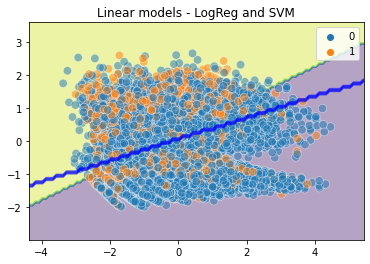

In [138]:
## Plotting decision boundary for LR
z1 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z1 = z1.reshape(xx.shape)

## Plotting decision boundary for SVM
z2 = svm.predict(np.c_[xx.ravel(), yy.ravel()])
z2 = z2.reshape(xx.shape)

# Displaying the result
plt.contourf(xx, yy, z1, alpha=0.4) # LR
plt.contour(xx, yy, z2, alpha=0.4, colors = 'blue') # SVM
# Here all the 3 metrics xx ,yy, z1 have the same shape. So that now we have feature combinations from xx & yy and the
  # corresponding label is given by z1 
# These 2 line of codes only creates the hyperplanes 

sns.scatterplot(X[:,0], X[:,1], hue = y_train, s = 70, alpha = 0.5)
# the points in the graph are the actual points. 

plt.title('Linear models - LogReg and SVM')

Here we can notice the difference between the decision boundary of logistic regression and the 

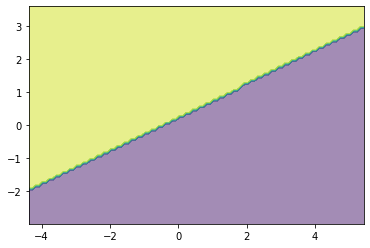

In [139]:
plt.contourf(xx, yy, z1, alpha=0.5)

In [ ]:
plt.contour(xx, yy, z2, alpha=0.4, colors = 'blue')

In [ ]:
z1 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z1 = z1.reshape(xx.shape)

In [ ]:
plt.contourf(xx, yy, z2, alpha=0.4) 

In [ ]:
sns.scatterplot(X[:,0], X[:,1], hue = y_train, s = 50, alpha = 0.8)

In [ ]:
sns.scatterplot(X[:,0], X[:,1], s = 50, alpha = 0.8)

### Decision Tree (non linear model)  

Non linear model performs better than the linear models. It can be because there was some hidden non linear pattern in the data which was not captured by the linear models. 

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
weights_dict

{0: 1.0, 1: 3.925373134328358}

In [142]:
selected_features_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'balance_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [143]:
# Here we will use the unscaled continous variables
X_train = df_train1[selected_features_dt].values
X_val = df_val1[selected_features_dt].values

In [144]:
clf = DecisionTreeClassifier(criterion = 'entropy' , class_weight = weights_dict , max_depth = 4, max_features = None,
                               min_samples_split = 25, min_samples_leaf = 15 )

In [145]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=4, min_samples_leaf=15,
                       min_samples_split=25)

In [146]:
# checking the importance of different features of the model 
pd.DataFrame({'features': selected_features_dt , 'importance' : clf.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
2,Age,0.476841
3,NumOfProducts,0.351863
0,IsActiveMember,0.096402
6,balance_per_product,0.032268
1,country_Germany,0.028361
7,bal_by_est_salary,0.010400
4,EstimatedSalary,0.003865
5,Surname_enc,0.000000
8,tenure_age_ratio,0.000000
9,age_surname_mean_churn,0.000000


In [147]:
# evaluation of training metrics
roc_auc_score(y_train, clf.predict(X_train))
recall_score(y_train, clf.predict(X_train))
confusion_matrix(y_train, clf.predict(X_train))
print(classification_report(y_train, clf.predict(X_train)))

0.7514707829672929

0.7369402985074627

array([[4835, 1477],
       [ 423, 1185]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6312
           1       0.45      0.74      0.56      1608

    accuracy                           0.76      7920
   macro avg       0.68      0.75      0.70      7920
weighted avg       0.82      0.76      0.78      7920



In [148]:
# evaluation of validation metrics
roc_auc_score(y_val, clf.predict(X_val))
recall_score(y_val, clf.predict(X_val))
confusion_matrix(y_val, clf.predict(X_val))
print(classification_report(y_val, clf.predict(X_val)))

0.7477394758378411

0.7436974789915967

array([[633, 209],
       [ 61, 177]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



### Plot decision boundary of non linear model  

In [149]:
selected_features_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'balance_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [150]:
list2 = ["IsActiveMember","country_Germany", "Age","NumOfProducts","EstimatedSalary","Surname_enc","balance_per_product","bal_by_est_salary","tenure_age_ratio","age_surname_mean_churn"]
X_train2 = df_train1[list2]
X2 = pca.fit_transform(X_train2)
pca.explained_variance_ratio_
# Here we can see that when we consider "Surname_enc" instead of 'balance', then our output match with the instructor's output

array([0.51069916, 0.48930078])

In [152]:
X = pca.fit_transform(X_train)

In [153]:
X_min , X_max =  X[:, 0].min() -1  , X[:, 0].max() +1
y_min , X_max = X[:, 1].min() -1  , X[:, 1].max() +1
xx , yy = np.meshgrid(np.arange(X_min , X_max , 100) , np.arange(y_min , y_max , 100))

In [154]:
xx.shape

(1026, 2838)

In [155]:
## Fitting tree model on 2 features
clf.fit(X , y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=4, min_samples_leaf=15,
                       min_samples_split=25)

<Axes: >

Text(0.5, 1.0, 'Decision Tree')

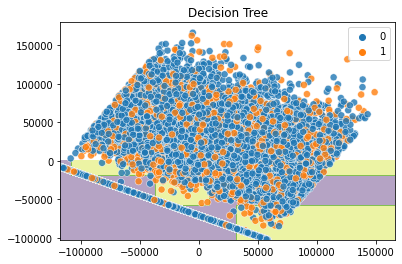

In [156]:
## Plotting decision boundary for Decision Tree (DT)
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Displaying the result
plt.contourf(xx, yy, z, alpha=0.4) # DT
sns.scatterplot(X[:,0], X[:,1], hue = y_train, s = 50, alpha = 0.8)
plt.title('Decision Tree')

## Decision tree rule engine visualization 

In [157]:
from sklearn.tree import export_graphviz
import subprocess

In [158]:
clf = DecisionTreeClassifier(criterion = 'entropy' , class_weight = weights_dict , max_depth = 3, max_features = None,
                               min_samples_split = 25, min_samples_leaf = 15 )

In [159]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=3, min_samples_leaf=15,
                       min_samples_split=25)

In [160]:
# export as dot file 
dot_data = export_graphviz(clf , out_file = 'tree.dot', feature_names = selected_features_dt , 
                           class_names = ['Did not churn' , 'Churned'], rounded = True , proportion = False,
                          precision = 2 , filled = True)

In [161]:
# Convert to png using system command (requires Graphviz)
subprocess.run(['dot', '-Tpng','tree.dot', '-o', 'tree.png', '-Gdpi=600' ])

CompletedProcess(args=['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], returncode=0)

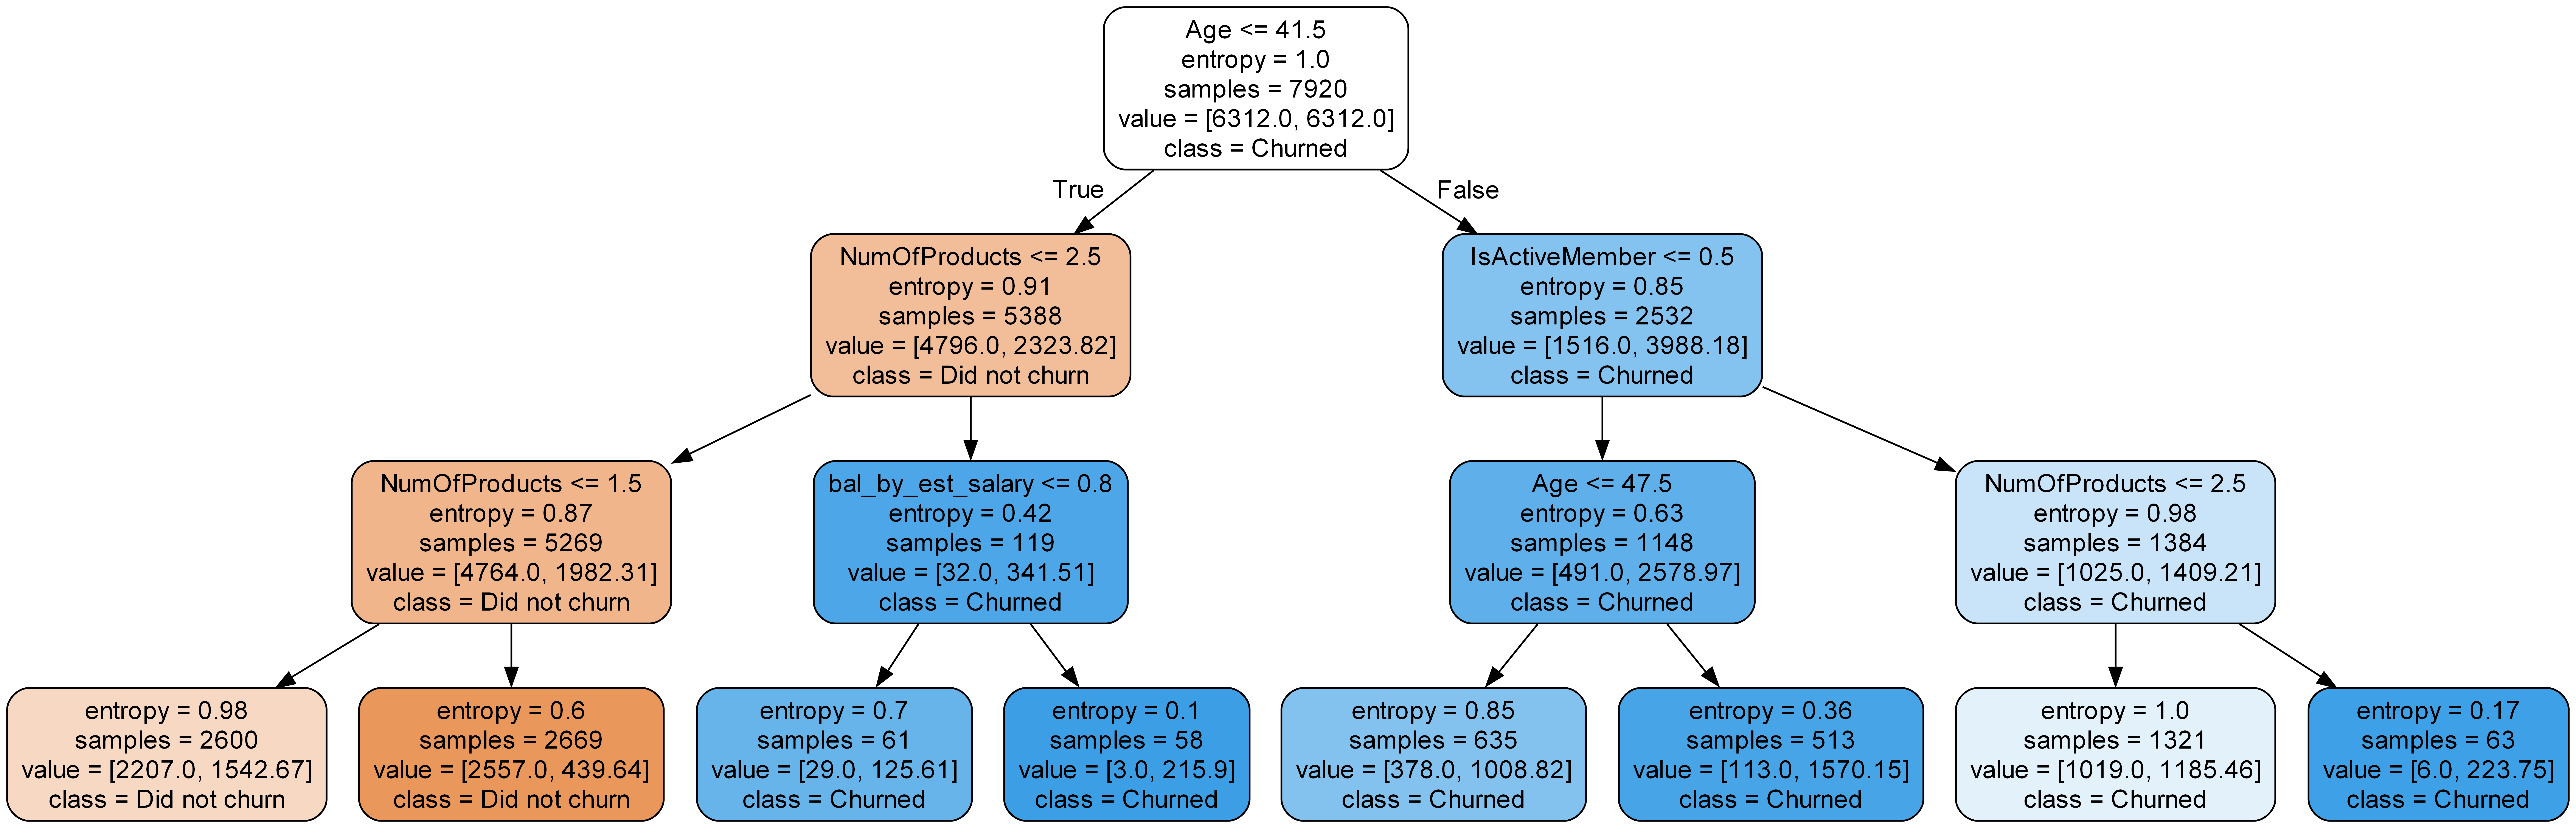

In [162]:
# Display the rule-set of a single tree
from IPython.display import Image
Image(filename = 'tree.png')

* If it is linear model, then I need to use scaled continous variables & those 10 variables which are important for linear models. 
* If it is non-linear model (tree model), then I need to use non-scaled continous variables & those 10 variables which are important for non-linear models.

# Arranging Data

In [163]:
# All of these 3 datasets have "Exited"
df_train1.columns
df_test1.columns
df_val1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'balance_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'balance_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'balance_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [164]:
# Dropping the target variable from all the 3 feature sets 
df_train1 = df_train1.drop(columns = ["Exited"] , axis =1)
df_test1 = df_test1.drop(columns = ["Exited"] , axis =1)
df_val1 = df_val1.drop(columns = ["Exited"] , axis =1)

In [165]:
# Linear model
X_train_linear = np.concatenate((df_train1[selected_cat_vars].values , sc_X_train[selected_cont_vars].values) ,axis =1)
X_val_linear = np.concatenate((df_val1[selected_cat_vars].values , sc_X_val[selected_cont_vars]) , axis =1)
X_test_linear = np.concatenate((df_test1[selected_cat_vars].values , sc_X_test[selected_cont_vars]) , axis =1)

In [166]:
# non-linear model
# taking all the features, not just the features which are important (from RFE)
X_train = df_train1.values
X_val = df_val1.values
X_test= df_test1.values

In [167]:
# non-linear model
# taking features which are important (from RFE)
X_train2 = df_train1[selected_features_dt].values
X_val2 = df_val1[selected_features_dt].values
X_test2= df_test1[selected_features_dt].values

In [ ]:
selected_features_dt

In [ ]:
weights_dict = {0 : 1.0, 1 : 3.93}

## Model Zoo + K fold cross validation 

In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
# Importing the models to be tried out
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [170]:
weight = 3.93

In [171]:
# Preparing a list of models to try out in the spot checking process
def model_zoo(models = dict()):
    # Tree models
    for n_trees in [21, 1001]:
        models['rf_' + str(n_trees)] = RandomForestClassifier(n_estimators = n_trees, n_jobs = -1, criterion = 'entropy'
                                                              , class_weight = weights_dict, max_depth = 6, max_features = 0.6
                                                              , min_samples_split = 30, min_samples_leaf = 20)
        
        models['lgb_' + str(n_trees)] = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1
                                                       , n_estimators=n_trees, class_weight=weights_dict, min_child_samples=20
                                                       , colsample_bytree=0.6, reg_alpha=0.3, reg_lambda=1.0, n_jobs=- 1
                                                       , importance_type = 'gain')
        
        models['xgb_' + str(n_trees)] = XGBClassifier(objective='binary:logistic', n_estimators = n_trees, max_depth = 6
                                                      , learning_rate = 0.03, n_jobs = -1, colsample_bytree = 0.6
                                                      , reg_alpha = 0.3, reg_lambda = 0.1, scale_pos_weight = weight)
        
        models['et_' + str(n_trees)] = ExtraTreesClassifier(n_estimators=n_trees, criterion = 'entropy', max_depth = 6
                                                            , max_features = 0.6, n_jobs = -1, class_weight = weights_dict
                                                            , min_samples_split = 30, min_samples_leaf = 20)
    
    # kNN models
    for n in [3,5,11]:
        models['knn_' + str(n)] = KNeighborsClassifier(n_neighbors=n)
    
    # Naive-Bayes models
    models['gauss_nb'] = GaussianNB()
    models['multi_nb'] = MultinomialNB()
    models['compl_nb'] = ComplementNB()
    models['bern_nb'] = BernoulliNB()
    
    return models

* Here we are not using the neural network because of very less number of data points. Neural network is effective especially when we have larger number of data points.
* for knn if we using very small number of neighbours the the model would be underfit and if we use very large number of neighbours then it would be overfit
* Only for the k-nearest neighbour model we will use the scaled continous variables whereas for other algorithms we will use non scaled features.

In [172]:
def evaluate_models(X , y, models, folds = 5 , metric = 'recall'):
    results = dict()
    for name , model in models.items():
        scores = cross_val_score(model , X , y, cv = folds, scoring =metric , n_jobs = -1)
        
        results[name] = scores
        mu , sigma = np.mean(scores) , np.std(scores)
        
        print('Model {}: mean = {}, std_dev = {}'.format(name, mu, sigma))
    
    return results

* Recall is the measure of sensitivity, it tells that out of all the positive cases how many of them are predicted correcly by the model 

In [173]:
## Spot-checking in action (taking all the features)
models = model_zoo()
print('Recall metric')
results = evaluate_models(X_train, y_train , models, metric = 'recall')
print('F1-score metric')
results = evaluate_models(X_train, y_train  , models, metric = 'f1')

Recall metric
Model rf_21: mean = 0.7437743077726824, std_dev = 0.0197183440135918
Model lgb_21: mean = 0.771747837696639, std_dev = 0.017564662202852716
Model xgb_21: mean = 0.7667730887560225, std_dev = 0.025099991059937418
Model et_21: mean = 0.741270486252201, std_dev = 0.017641125285411233
Model rf_1001: mean = 0.7468702230993982, std_dev = 0.026472732926226875
Model lgb_1001: mean = 0.689050134478822, std_dev = 0.015816534385019464
Model xgb_1001: mean = 0.6735008997503918, std_dev = 0.011484426182981197
Model et_1001: mean = 0.7344497977980302, std_dev = 0.008095892110716657
Model knn_3: mean = 0.1952709893384416, std_dev = 0.020375966258167587
Model knn_5: mean = 0.1511193668853157, std_dev = 0.02196285375649144
Model knn_11: mean = 0.08893984249530774, std_dev = 0.012292644326016655
Model gauss_nb: mean = 0.03484646194926568, std_dev = 0.015217123584491326
Model multi_nb: mean = 0.5404191095373541, std_dev = 0.022285871235774777
Model compl_nb: mean = 0.5404191095373541, std_d

In [174]:
## Spot-checking in action (taking only the important features)
models = model_zoo()
print('Recall metric')
results = evaluate_models(X_train2, y_train , models, metric = 'recall')
print('F1-score metric')
results = evaluate_models(X_train2, y_train  , models, metric = 'f1')

Recall metric
Model rf_21: mean = 0.7555774849557864, std_dev = 0.023344971722688755
Model lgb_21: mean = 0.7686441825816064, std_dev = 0.015738731084398716
Model xgb_21: mean = 0.7642828118650955, std_dev = 0.02485151026890009
Model et_21: mean = 0.7238714421160581, std_dev = 0.00976199383673856
Model rf_1001: mean = 0.7524602852111995, std_dev = 0.026392109586100602
Model lgb_1001: mean = 0.6890249801667924, std_dev = 0.02792474034824213
Model xgb_1001: mean = 0.6747295911456821, std_dev = 0.027609798859464033
Model et_1001: mean = 0.7213850351192894, std_dev = 0.009159325795435186
Model knn_3: mean = 0.14116793405700354, std_dev = 0.014500098360883484
Model knn_5: mean = 0.10136220274375496, std_dev = 0.014750265431160406
Model knn_11: mean = 0.04663802944989455, std_dev = 0.003885793850226993
Model gauss_nb: mean = 0.020533658404442635, std_dev = 0.008047306491295963
Model multi_nb: mean = 0.5186432151080668, std_dev = 0.019812757370296055
Model compl_nb: mean = 0.5186432151080668,

In [175]:
lgb_21 = LGBMClassifier(boosting_type='dart', class_weight={0: 1.0, 1: 3.93},
                colsample_bytree=0.6, importance_type='gain', max_depth=6,
                n_estimators=21, reg_alpha=0.3, reg_lambda=1.0)

In [176]:
lgb_21.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500295 -> initscore=0.001178
[LightGBM] [Info] Start training from score 0.001178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', class_weight={0: 1.0, 1: 3.93},
               colsample_bytree=0.6, importance_type='gain', max_depth=6,
               n_estimators=21, reg_alpha=0.3, reg_lambda=1.0)

In [177]:
# evaluation of training metrics
roc_auc_score(y_train, lgb_21.predict(X_train))
recall_score(y_train, lgb_21.predict(X_train))
confusion_matrix(y_train, lgb_21.predict(X_train))
print(classification_report(y_train, lgb_21.predict(X_train)))

0.8368542269640392

0.8296019900497512

array([[5328,  984],
       [ 274, 1334]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6312
           1       0.58      0.83      0.68      1608

    accuracy                           0.84      7920
   macro avg       0.76      0.84      0.79      7920
weighted avg       0.87      0.84      0.85      7920



In [178]:
# evaluation of validation metrics
roc_auc_score(y_val, lgb_21.predict(X_val))
recall_score(y_val, lgb_21.predict(X_val))
confusion_matrix(y_val, lgb_21.predict(X_val))
print(classification_report(y_val, lgb_21.predict(X_val)))

0.7718617138066628

0.7016806722689075

array([[709, 133],
       [ 71, 167]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       842
           1       0.56      0.70      0.62       238

    accuracy                           0.81      1080
   macro avg       0.73      0.77      0.75      1080
weighted avg       0.83      0.81      0.82      1080



* The choosen model looks like overfitting.

* Based on the relevant metric, a suitable model can be chosen for further hyperparameter tuning.
* LightGBM is chosen for further hyperparameter tuning because it has the best performance on recall metric and it came close second when comparing using F1-scores

**Problem: In the tree zoo we set up hyperparameters and we compared the results of the resulting models and choosed the best model based on the metrics. But there can be a possibility that if we change the hyperparameters and then compared different models then the best model can be different. Shouldn't we perform hyperparameter tuining for all the models and compare their best versions?**  

## Hyperparameter tuining 
* RandomSearchCV and the GridSearchCV are the 2 most popular algorithm for the hyperparameter tuining
* Random Search is more suitable for large datasets, with a large number of parameter settings
* Grid Search results in a more precise hyperparameter tuning, thus resulting in better model performance. Intelligent tuning mechanism can also help reduce the time taken in GridSearch by a large factor
* Will optimize on F1 metric. We could easily reach 75% Recall from the default parameters as seen earlier

In [179]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

### Randomized Search 

In [180]:
# exhaustive list of parameters
parameters = {'n_estimators':[10, 21, 51, 100, 201, 350, 501]
             ,'max_depth': [3, 4, 6, 9]
             ,'num_leaves':[7, 15, 31] 
             ,'learning_rate': [0.03, 0.05, 0.1, 0.5, 1]
             ,'colsample_bytree': [0.3, 0.6, 0.8]
             ,'reg_alpha': [0, 0.3, 1, 5]
             ,'reg_lambda': [0.1, 0.5, 1, 5, 10]
             ,'class_weight': [{0:1,1:1.0}, {0:1,1:1.96}, {0:1,1:3.0}, {0:1,1:3.93}]
             }

In [181]:
lgb = LGBMClassifier(boosting_type = 'dart', min_child_samples = 20, n_jobs = - 1, importance_type = 'gain', num_leaves = 31)

In [182]:
search = RandomizedSearchCV(lgb , parameters , n_iter = 20, cv = 5 , scoring = 'f1')

In [183]:
search.fit(X_train, y_train.ravel())

[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500441 -> initscore=0.001763
[LightGBM] [Info] Start training from score 0.001763
[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500441 -> initscore=0.001763
[LightGBM] 

[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500441 -> initscore=0.001763
[LightGBM] [Info] Start training from score 0.001763
[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500441 -> initscore=0.001763
[LightGBM] [Info] Start training from score 0.001763
[LightGBM] [Info] Numb

[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203125 -> initscore=-1.366876
[LightGBM] [Info] Start training from score -1.366876
[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202967 -> initscore=-1.367852
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268264
[LightGBM] [Info] Start training from score -0.268264
[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433094 -> initscore=-0.269239
[LightGBM] [Info] Start training from score -0.269239
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433094 -> initscore=-0.269239
[LightGBM] [Info] Start training from score -0.269239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500197 -> initscore=0.000788
[LightGBM] [Info] Start training from score 0.000788
[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500197 -> initscore=0.000788
[LightGBM] [Info] Start training from score 0.000788
[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_col

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333159 -> initscore=-0.693932
[LightGBM] [Info] Start training from score -0.693932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202967 -> initscore=-1.367852
[LightGBM] [Info] Start training from score -1.367852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 1286, number of negative: 5050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433094 -> initscore=-0.269239
[LightGBM] [Info] Start training from score -0.269239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1287, number of negative: 5049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 17
[LightGBM] [I

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(boosting_type='dart',
                                            importance_type='gain', n_jobs=-1),
                   n_iter=20,
                   param_distributions={'class_weight': [{0: 1, 1: 1.0},
                                                         {0: 1, 1: 1.96},
                                                         {0: 1, 1: 3.0},
                                                         {0: 1, 1: 3.93}],
                                        'colsample_bytree': [0.3, 0.6, 0.8],
                                        'learning_rate': [0.03, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_depth': [3, 4, 6, 9],
                                        'n_estimators': [10, 21, 51, 100, 201,
                                                         350, 501],
                                        'num_leaves': [7, 15, 31],
                                        'reg_alpha': [0, 0.3, 1, 5],
                                        'reg_lambda': [0.1, 0.5, 1, 5, 10]},
                   scoring='f1')

In [184]:
search.best_params_
search.best_score_
# search.best_score_ provides the average cross-validated F1 score across the 5 folds for the best-performing model.

{'reg_lambda': 5,
 'reg_alpha': 0,
 'num_leaves': 31,
 'n_estimators': 501,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6,
 'class_weight': {0: 1, 1: 3.0}}

0.6839176573277457

In [185]:
# This is the list of all the combinations used
search.cv_results_

{'mean_fit_time': array([0.0685905 , 0.03141842, 0.04548464, 0.06373963, 0.03291731,
        0.02960644, 0.05804853, 0.26552496, 0.08787985, 0.10064487,
        0.14793372, 0.04160328, 0.22673125, 0.37156005, 1.44985213,
        2.98924298, 1.31329498, 0.04568577, 2.37435951, 0.07873282]),
 'std_fit_time': array([0.02515017, 0.00199461, 0.00197855, 0.00926492, 0.00233986,
        0.00220925, 0.00623201, 0.03125478, 0.01198047, 0.02287281,
        0.04889078, 0.00215919, 0.05168787, 0.05848743, 0.17383885,
        0.65230824, 0.15967402, 0.00162831, 0.05156626, 0.01029196]),
 'mean_score_time': array([0.00847917, 0.00658226, 0.00668235, 0.00857816, 0.00638289,
        0.0070632 , 0.00748224, 0.01037159, 0.00777869, 0.00857677,
        0.0086782 , 0.00737853, 0.0094769 , 0.01176896, 0.01615763,
        0.02233992, 0.01595821, 0.0078825 , 0.0208457 , 0.00927739]),
 'std_score_time': array([2.27315313e-03, 4.88713960e-04, 3.96898450e-04, 1.49241442e-03,
        4.88558226e-04, 9.92246310e-

### Grid Search  

In [ ]:
# Possible hyperparameters
parameters = {'n_estimators':[10, 21, 51, 100, 201, 350, 501]
             ,'max_depth': [3, 4, 6, 9]
             ,'num_leaves':[7, 15, 31] 
             ,'learning_rate': [0.03, 0.05, 0.1, 0.5, 1]
             ,'colsample_bytree': [0.3, 0.6, 0.8]
             ,'reg_alpha': [0.3, 1, 5]
             ,'reg_lambda': [0.1, 0.5, 1, 5, 10]
             ,'class_weight': [{0:1,1:1.0}, {0:1,1:1.96}, {0:1,1:3.0}, {0:1,1:3.93}]
             }

* Take reference from the randomised search

In [ ]:
parameters = {'n_estimators':[10]
             ,'max_depth': [3]
             ,'num_leaves':[15] 
             ,'learning_rate': [1]
             ,'colsample_bytree': [0.6]
             ,'reg_alpha': [5]
             ,'reg_lambda': [5]
             ,'class_weight': [{0:1,1:3.93}]
             }

In [ ]:
lgb = LGBMClassifier(boosting_type = 'dart', min_child_samples = 20, n_jobs = - 1, importance_type = 'gain', num_leaves = 31)

In [ ]:
grid = GridSearchCV(lgb, parameters, cv = 5, scoring = 'f1', n_jobs = -1)
grid.fit(X_train, y_train.ravel())
grid.best_params_
grid.best_score_

In [ ]:
grid = GridSearchCV(lgb, parameters, cv = 5, scoring = 'recall', n_jobs = -1)
grid.fit(X_train, y_train.ravel())
grid.best_params_
grid.best_score_

# Best model based on randomised search 

In [ ]:
{'reg_lambda': 5,
 'reg_alpha': 0,
 'num_leaves': 31,
 'n_estimators': 501,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6,
 'class_weight': {0: 1, 1: 3.0}}

In [186]:
# Best model (as per f1 score)
lgb_best_f1 = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1,1:3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0, reg_lambda = 5)

In [187]:
lgb_best_f1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433190 -> initscore=-0.268849
[LightGBM] [Info] Start training from score -0.268849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0},
               colsample_bytree=0.6, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, reg_alpha=0, reg_lambda=5)

In [189]:
# evaluation of training metrics
roc_auc_score(y_train, lgb_best_f1.predict(X_train))
recall_score(y_train, lgb_best_f1.predict(X_train))
confusion_matrix(y_train, lgb_best_f1.predict(X_train))
print(classification_report(y_train, lgb_best_f1.predict(X_train)))

0.9481158844560467

0.9415422885572139

array([[6026,  286],
       [  94, 1514]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6312
           1       0.84      0.94      0.89      1608

    accuracy                           0.95      7920
   macro avg       0.91      0.95      0.93      7920
weighted avg       0.96      0.95      0.95      7920



In [190]:
# evaluation of validation metrics
roc_auc_score(y_val, lgb_best_f1.predict(X_val))
recall_score(y_val, lgb_best_f1.predict(X_val))
confusion_matrix(y_val, lgb_best_f1.predict(X_val))
print(classification_report(y_val, lgb_best_f1.predict(X_val)))

0.7282979700193617

0.5504201680672269

array([[763,  79],
       [107, 131]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       842
           1       0.62      0.55      0.58       238

    accuracy                           0.83      1080
   macro avg       0.75      0.73      0.74      1080
weighted avg       0.82      0.83      0.82      1080



### Can we do better - ensembles 
2 ways we are trying here 
- model averaging 
- stacking 

In [191]:
## Three versions of the final model with best params for F1-score metric

# Equal weights to both target classes (no class imbalance correction)


lgb1 = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1.0,1:1.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0, reg_lambda = 5)


# Addressing class imbalance completely by weighting the undersampled class by the class imbalance ratio

lgb2 = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1.0,1:3.93}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0, reg_lambda = 5)


# Best class_weight parameter settings (partial class imbalance correction)
lgb3 = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1.0,1:3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0, reg_lambda = 5)

In [192]:
lgb1.fit(X_train, y_train)
lgb2.fit(X_train, y_train)
lgb3.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203030 -> initscore=-1.367461
[LightGBM] [Info] Start training from score -1.367461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(boosting_type='dart', class_weight={0: 1.0, 1: 1.0},
               colsample_bytree=0.6, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, reg_alpha=0, reg_lambda=5)

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500295 -> initscore=0.001178
[LightGBM] [Info] Start training from score 0.001178


LGBMClassifier(boosting_type='dart', class_weight={0: 1.0, 1: 3.93},
               colsample_bytree=0.6, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, reg_alpha=0, reg_lambda=5)

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433190 -> initscore=-0.268849
[LightGBM] [Info] Start training from score -0.268849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', class_weight={0: 1.0, 1: 3.0},
               colsample_bytree=0.6, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, reg_alpha=0, reg_lambda=5)

In [193]:
## Getting prediction probabilities from each of these models
m1_pred_probs_trn = lgb1.predict_proba(X_train)
m2_pred_probs_trn = lgb2.predict_proba(X_train)
m3_pred_probs_trn = lgb3.predict_proba(X_train)

In [194]:
## Getting prediction probabilities from each of these models
m1_pred_probs_val = lgb1.predict_proba(X_val)
m2_pred_probs_val = lgb2.predict_proba(X_val)
m3_pred_probs_val = lgb3.predict_proba(X_val)

In [195]:
## Checking correlations between the predictions of the 3 models
df_t = pd.DataFrame({'m1_pred': m1_pred_probs_trn[:,1], 'm2_pred': m2_pred_probs_trn[:,1], 'm3_pred': m3_pred_probs_trn[:,1]})
df_t.shape
df_t.corr()

(7920, 3)

,m1_pred,m2_pred,m3_pred
m1_pred,1.000000,0.961012,0.972121
m2_pred,0.961012,1.000000,0.994856
m3_pred,0.972121,0.994856,1.000000


Although models m1 and m2 are highly correlated (0.9), they are still less closely associated than m2 and m3. Thus, we'll try to form an ensemble of m1 and m2 (model averaging/stacking) and see if that improves the model accuracy

In [196]:
## Getting prediction probabilities from each of these models
m1_pred_probs_val = lgb1.predict_proba(X_val)
m2_pred_probs_val = lgb2.predict_proba(X_val)
m3_pred_probs_val = lgb3.predict_proba(X_val)

In [197]:
threashold = 0.5

In [198]:
# Models predictions on validation data
m1_preds = np.where(m1_pred_probs_val[:,1] >= threashold , 1,0)
m3_preds = np.where(m3_pred_probs_val[:,1] >= threashold , 1,0)
m2_preds = np.where(m2_pred_probs_val[:,1] >= threashold , 1,0)

In [199]:
## Model averaging predictions (Weighted average)
m1_m2_preds = np.where((  (0.1*m1_pred_probs_val[:,1]) + (0.9*m2_pred_probs_val[:,1]) ) >= threashold , 1,0)
# here we can change the weights and accordingly we can see the change in the performance. In this way we will select the best weights

In [200]:
# Model 1 
roc_auc_score(y_val ,m1_preds )
recall_score(y_val ,m1_preds)
confusion_matrix(y_val ,m1_preds)
print(classification_report(y_val ,m1_preds))

0.7000788438890996

0.4369747899159664

array([[811,  31],
       [134, 104]], dtype=int64)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       842
           1       0.77      0.44      0.56       238

    accuracy                           0.85      1080
   macro avg       0.81      0.70      0.73      1080
weighted avg       0.84      0.85      0.83      1080



In [201]:
# Model 2 
roc_auc_score(y_val ,m2_preds )
recall_score(y_val ,m2_preds)
confusion_matrix(y_val ,m2_preds)
print(classification_report(y_val ,m2_preds))

0.7478891794247391

0.6050420168067226

array([[750,  92],
       [ 94, 144]], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       842
           1       0.61      0.61      0.61       238

    accuracy                           0.83      1080
   macro avg       0.75      0.75      0.75      1080
weighted avg       0.83      0.83      0.83      1080



In [202]:
# Model 3 (best model)
roc_auc_score(y_val ,m3_preds )
recall_score(y_val ,m3_preds)
confusion_matrix(y_val ,m3_preds)
print(classification_report(y_val ,m3_preds))

0.7282979700193617

0.5504201680672269

array([[763,  79],
       [107, 131]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       842
           1       0.62      0.55      0.58       238

    accuracy                           0.83      1080
   macro avg       0.75      0.73      0.74      1080
weighted avg       0.82      0.83      0.82      1080



In [203]:
## Ensemble model prediction on validation set
roc_auc_score(y_val ,m1_m2_preds )
recall_score(y_val ,m1_m2_preds)
confusion_matrix(y_val ,m1_m2_preds)
print(classification_report(y_val ,m1_m2_preds))

0.7427293957963234

0.5840336134453782

array([[759,  83],
       [ 99, 139]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       842
           1       0.63      0.58      0.60       238

    accuracy                           0.83      1080
   macro avg       0.76      0.74      0.75      1080
weighted avg       0.83      0.83      0.83      1080



* Here we can notice that the weighted model (of m1 & m2) have outperformed the best model. 

### Model staking  

The base models are the 2 LightGBM models with different class_weights parameters. They are stacked on top by a logistic regression model.
***
For training, we have the predictions from the 2 models on the train set. They go in as the input to the next layer of the Ensemble, which is the logistic regression model, and train the LogReg model (logistic regression model)
***
For prediction, we first predict using the 2 LGBM models on the validation set. The predictions from the two models go as inputs to the logistic regression which gives out the final prediction

* We are staking models1 & 2 because we have seen the correlation table above.
* Here instead of using the logistic regression, we can also use the decision tree and others

In [204]:
# model initialization
lr = LogisticRegression(C = 1.0 , class_weight = {0:1, 1:3.93})

# Concatenating the probability predictions of the 2 models on train set
# training dataset for the logistic regression model
X_t = np.c_[m1_pred_probs_trn[:,1] , m2_pred_probs_trn[:,1]]

# fit staker model on top of outputs of the base model 
# this is trainined on the training data
lr.fit(X_t , y_train)

LogisticRegression(class_weight={0: 1, 1: 3.93})

In [205]:
# Predictions
# Concatenating outputs from both the base models on the validation set
X_t_val = np.c_[m1_pred_probs_val[:,1],m2_pred_probs_val[:,1]]

In [206]:
# Predict using the stacker model
m1_m2_preds = lr.predict(X_t_val)

In [207]:
## Ensemble model prediction on validation set
roc_auc_score(y_val, m1_m2_preds)
recall_score(y_val, m1_m2_preds)
confusion_matrix(y_val, m1_m2_preds)
print(classification_report(y_val, m1_m2_preds))

0.7403540988842093

0.5840336134453782

array([[755,  87],
       [ 99, 139]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       842
           1       0.62      0.58      0.60       238

    accuracy                           0.83      1080
   macro avg       0.75      0.74      0.74      1080
weighted avg       0.82      0.83      0.83      1080



* Hence relative to the best model (model_3) we can see that the recall & F1 score have improved

In [ ]:
# Model weights learnt by the stacker LogReg model
lr.coef_
lr.intercept_

## Error Analysis  

In [208]:
## Final model with best params for F1-score metric
lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1,1:1.96}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 15, colsample_bytree = 0.8, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0.3, reg_lambda = 0.1)

In [209]:
lgb.fit(X_train , y_train.ravel())

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333029 -> initscore=-0.694517
[LightGBM] [Info] Start training from score -0.694517


LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 1.96},
               colsample_bytree=0.8, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, num_leaves=15, reg_alpha=0.3,
               reg_lambda=0.1)

In [210]:
roc_auc_score(y_train ,lgb.predict(X_train) )
recall_score(y_train ,lgb.predict(X_train))
confusion_matrix(y_train ,lgb.predict(X_train))
print(classification_report(y_train ,lgb.predict(X_train)))

0.8806821406276603

0.8022388059701493

array([[6054,  258],
       [ 318, 1290]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6312
           1       0.83      0.80      0.82      1608

    accuracy                           0.93      7920
   macro avg       0.89      0.88      0.89      7920
weighted avg       0.93      0.93      0.93      7920



In [211]:
roc_auc_score(y_val ,lgb.predict(X_val) )
recall_score(y_val ,lgb.predict(X_val))
confusion_matrix(y_val ,lgb.predict(X_val))
print(classification_report(y_val ,lgb.predict(X_val)))

0.7203536996746442

0.5084033613445378

array([[785,  57],
       [117, 121]], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       842
           1       0.68      0.51      0.58       238

    accuracy                           0.84      1080
   macro avg       0.78      0.72      0.74      1080
weighted avg       0.83      0.84      0.83      1080



In [ ]:
## Making predictions on a copy of validation set
df_ea = df_val1.copy()   
df_ea['y_pred'] = lgb.predict(df_val1)
df_ea['y_pred_prob'] = lgb.predict_proba(df_val1)[:,1]
df_ea['Exited'] = y_val

In [ ]:
df_ea[df_ea["y_pred"]==1].head(10)

In [ ]:
## Visualizing distribution of predicted probabilities
sns.violinplot(df_ea['Exited'].values , df_ea['y_pred_prob'])

For the churned class y =1 , the area below 0.5 represents the error and for the non churned class y = 0, the area above 0.5 represents the errors.

In [ ]:
## Visualizing distribution of predicted probabilities
sns.boxplot(y_val.ravel(), df_ea['y_pred_prob'].values)

**Revisited bivariate plots of important features**
***
The difference in distribution of these features across the two classes help us to test a few hypotheses

In [ ]:
sns.boxplot(x = 'Exited' , y = 'Age' , data = df_ea)

* People who churns mostly belongs to the age between 39 to 52
* People who do not churns mostly belongs to the age between 32 to 42

In [ ]:
df_ea['Exited'].value_counts(normalize = True)

# Actual distribution of churned and non churned cases in the sample of people belongs to the age between 42 and 53
df_ea[(df_ea['Age'] > 42) & (df_ea['Age'] < 53)]['Exited'].value_counts(normalize = True)

# Predicted distribution
df_ea[(df_ea['Age'] > 42) & (df_ea['Age'] < 53)]['y_pred'].value_counts(normalize = True)

**Probem : Based on Boxplot how you decided this range?**


In [ ]:
## Checking correlation between features and target variable vs predicted variable
x = df_ea[['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary','y_pred','Exited']].corr()
x[['y_pred' , 'Exited']]

In [ ]:
x = df_ea.corr()
x[['y_pred' , 'Exited']]

* Age is highly correlated with the predcted values compared to the actual values => 'Age' is given more importance
* Hence whatever error we can see that is because some variables are given more importance and some are given lesser importance.

**Extracting the subset of incorrect predictions**
***
All incorrect predictions are extracted and categorized into false positives (low precision) and false negatives (low recall)

In [ ]:
low_recall = df_ea[(df_ea['Exited'] ==1) & (df_ea['y_pred'] == 0)] # False Negative
low_prec = df_ea[(df_ea['Exited'] ==0) & (df_ea['y_pred'] == 1)] # False Positive
low_recall.shape
low_prec.shape

In [ ]:
low_recall.head()
low_prec.head()

In [ ]:
## Prediction probabilty distribution of errors causing low recall
sns.distplot(low_recall['y_pred_prob'] , hist = False)

* Here we can see that in most of the cases the prediction probability to be 1 is between 0.4 and 0.45 

In [ ]:
## Prediction probabilty distribution of errors causing low precision 
sns.distplot(low_prec['y_pred_prob'] , hist = False)

**Hence if we increase the threashold then precision can improve and if we decrease the threashold, recall can improve. Hence we need to pick the threshold such that objective matric could be optimised**

**Twerking the threashold of the classifier**

In [ ]:
threashold = 0.5

In [ ]:
## Predict on validation set with adjustable decision threshold
probs = lgb.predict_proba(df_val1)[:, 1]
val_preds = np.where(probs > threashold , 1 ,0 )

In [ ]:
## Default params : 0.5 threshold
print(classification_report(y_val , val_preds))

In [ ]:
# Decreased the threashold
threashold = 0.31
probs = lgb.predict_proba(df_val1)[:, 1]
val_preds = np.where(probs > threashold , 1 ,0 )
print(classification_report(y_val , val_preds))
# Recall have increased whereas precision have dropped

In [ ]:
threashold = 0.52
probs = lgb.predict_proba(df_val1)[:, 1]
val_preds = np.where(probs > threashold , 1 ,0 )
print(classification_report(y_val , val_preds))
# Recall have decreased whereas precision have increased

In [ ]:
threashold = 0.45
probs = lgb.predict_proba(df_val1)[:, 1]
val_preds = np.where(probs > threashold , 1 ,0 )
print(classification_report(y_val , val_preds))
# Recall have decreased whereas precision have increased

In [ ]:
threashold = 0.55
probs = lgb.predict_proba(df_val1)[:, 1]
val_preds = np.where(probs > threashold , 1 ,0 )
print(classification_report(y_val , val_preds))
# Recall have decreased whereas precision have increased

* 0.3 seems to be the best threashold because for this relative to the base case 0.5 both the recall & the f1 score have increased.
* Hence this is the trade off which we observed, and based on the onjective we will choose the threashold.

### Checking whether there is too much dependence on certain features 
***
We will compare few important features : NumOfProducts, IsActiveMember, Age, Balance

In [ ]:
df_ea['NumOfProducts'].value_counts(normalize = True).sort_index()
low_recall['NumOfProducts'].value_counts(normalize = True).sort_index()
low_prec['NumOfProducts'].value_counts(normalize = True).sort_index()

* People with 1 product are highly misclassified 
* If NumOfProducts = 1 or 2, then there is high chance of committing prediction error

In [ ]:
df_ea['IsActiveMember'].value_counts(normalize = True).sort_index()
low_recall['IsActiveMember'].value_counts(normalize = True).sort_index()
low_prec['IsActiveMember'].value_counts(normalize = True).sort_index()

High change of error when the customer is not the active member.

In [ ]:
sns.violinplot(y = df_ea['Age'])

In [ ]:
sns.violinplot(y = low_recall['Age'])

In [ ]:
sns.violinplot(y = low_prec['Age'])

It seems like between the age 40-45 there is high chance of committing error

In [ ]:
sns.violinplot(y = df_ea['Balance'])

In [ ]:
sns.violinplot(y = low_recall['Balance'])

In [ ]:
sns.violinplot(y = low_prec['Balance'])

* Here we can notice that we have committed a lot of false positive when the balance = 0 

## Train final best model ; save model and its parameters 

In [ ]:
# Best model (recall score used during the grid search )
lgb_best_recall = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1,1:3.93}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 3, num_leaves = 15, colsample_bytree = 0.6, learning_rate = 1
                     , n_estimators = 10, reg_alpha = 5, reg_lambda = 5)

In [ ]:
# Best model (f1 score used during the grid search)
lgb_best_f1 = LGBMClassifier(boosting_type = 'dart', class_weight = {0:1,1:1.96}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 9, num_leaves = 15, colsample_bytree = 0.8, learning_rate = 0.1
                     , n_estimators = 501, reg_alpha = 0.3, reg_lambda = 0.1)

Here it depends on the business objectives that which model we should deploy. Here they have choosed to go ahead with the model with best f1 score.

In [ ]:
# Best model is trained using the training data
lgb_best_f1.fit(X_train , y_train.ravel())

In [ ]:
# predict target probabilities 
val_probs = lgb_best_f1.predict_proba(X_val)[:,1]

# Predict target values on val data
val_preds = np.where(val_probs >0.31 , 1, 0)

In [ ]:
sns.boxplot(y_val.ravel() ,val_probs )

Although the threashold was 0.31 but still significant cases are there where probability was less than 0.31 but the actual value was 1. And that is leading to errors. 

In [ ]:
## Validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

In [ ]:
# This library is used to save the final model 
import joblib

In [ ]:
path = "C:\Personal\Carrier Path\Data_Scientist\Accumulated_content\AI\Implementation_project_pro\Various_Projects\Final Projects\Churn Prediction/"

In [ ]:
joblib.dump(lgb_best_f1 , path + 'final_churn_model_f1_0_31.sav')

* Save the final model by mentioning the proper version to that. It is very important because there would be time when we have aroud 20 - 25 saved models for the same task. Then to distingush among models would determine the success of the project.

# SHAP

In [212]:
pip install shap

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install numpy==1.23.0

In [213]:
import numpy as np

In [214]:
# Import SHAP liabrary
import shap

In [215]:
## Load JS visualization code to notebook
# you need this so the plots can be displayed
shap.initjs()

In [216]:
lgb_best_f1.fit(X_train , y_train.ravel())

[LightGBM] [Info] Number of positive: 1608, number of negative: 6312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433190 -> initscore=-0.268849
[LightGBM] [Info] Start training from score -0.268849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0},
               colsample_bytree=0.6, importance_type='gain', max_depth=9,
               n_estimators=501, n_jobs=-1, reg_alpha=0, reg_lambda=5)

In [217]:
explainer = shap.TreeExplainer(lgb_best_f1)

In [218]:
lgb_best_f1.predict_proba(df_train1)[0:10][7]

array([0.98260341, 0.01739659])

In [219]:
df_train1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Surname_enc,balance_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,678,1,36,1,117864.85,2,1,0,27619.06,0.0,1.0,0.0,0.000000,58932.395534,4.267519,0.027778,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,1.0,0.0,0.0,0.000000,125167.614832,0.628653,0.185185,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.200000,1.490712
3,513,1,30,5,0.00,2,1,0,162523.66,1.0,0.0,0.0,0.300000,0.000000,0.000000,0.166667,1.643168
4,639,1,22,4,0.00,2,1,0,28188.96,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.181818,2.345208
5,562,1,30,3,111099.79,2,0,0,140650.19,1.0,0.0,0.0,0.307692,55549.867225,0.789901,0.100000,1.685300
6,635,1,43,5,78992.75,2,0,0,153265.31,0.0,1.0,0.0,0.222222,39496.355252,0.515399,0.116279,1.457209
7,705,1,33,7,68423.89,1,1,1,64872.55,0.0,0.0,1.0,0.203056,68423.821576,1.054743,0.212121,1.166468
8,694,1,42,8,133767.19,1,1,0,36405.21,1.0,0.0,0.0,0.000000,133767.056233,3.674397,0.190476,0.000000
9,711,1,26,9,128793.63,1,1,0,19262.05,0.0,1.0,0.0,0.000000,128793.501206,6.686393,0.346154,0.000000


In [220]:
row_num = 7
shap_vals = explainer.shap_values(df_train1.iloc[row_num].values.reshape(1,-1))

In [221]:
shap_vals

[array([[-8.24106464e-03,  1.48475405e-01,  3.02539688e-01,
          8.44654672e-03, -1.85312511e-01, -2.65241014e-01,
         -1.49302646e-03,  2.38470072e-01, -1.34019871e-01,
         -5.79255541e-02, -5.23745101e-02,  5.77906583e-03,
          2.49196683e+00,  1.53006072e-02,  2.09656677e-02,
         -1.21536029e-01,  7.89826622e-02]]),
 array([[ 8.24106464e-03, -1.48475405e-01, -3.02539688e-01,
         -8.44654672e-03,  1.85312511e-01,  2.65241014e-01,
          1.49302646e-03, -2.38470072e-01,  1.34019871e-01,
          5.79255541e-02,  5.23745101e-02, -5.77906583e-03,
         -2.49196683e+00, -1.53006072e-02, -2.09656677e-02,
          1.21536029e-01, -7.89826622e-02]])]

In [222]:
## Explain single prediction
shap.force_plot(explainer.expected_value[1], shap_vals[1], df_train1.iloc[row_num], link = 'logit')

In [ ]:
## Check probability predictions through the model
pred_probs = lgb_best_f1.predict_proba(df_train1)[:,1]
pred_probs[row_num]

In [ ]:
## Explain global patterns/ summary stats
shap_values = explainer.shap_values(df_train1)
shap.summary_plot(shap_values  , df_train1)

# Load model and made prediction on unseen data

* Test data is the unseen data 

In [225]:
import joblib

In [223]:
path_model = "C:\Personal\Carrier Path\Data_Scientist\Accumulated_content\AI\Implementation_project_pro\Various_Projects\Final Projects\Churn Prediction/"

In [226]:
model = joblib.load(path_model + "final_churn_model_f1_0_31.sav")

In [227]:
# predict target probabilities 
test_probs = model.predict_proba(df_test1)[:,1]

In [228]:
test_pred = np.where(test_probs > 0.31, 1, 0)

<Axes: >

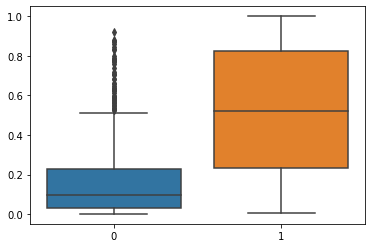

In [229]:
sns.boxplot(y_test.ravel(), test_probs)

In [230]:
## Test set metrics
roc_auc_score(y_test, test_pred)
recall_score(y_test, test_pred)
confusion_matrix(y_test, test_pred)
print(classification_report(y_test, test_pred))

0.7667309521806379

0.7015706806282722

array([[673, 136],
       [ 57, 134]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       809
           1       0.50      0.70      0.58       191

    accuracy                           0.81      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.81      0.82      1000



In [ ]:
## Adding predictions and their probabilities in the original test dataframe
test = df_test1.copy()
test['predictions'] = test_pred
test['pred_probabilities'] = test_probs

In [ ]:
y_test_true = df_test["Exited"].values

In [ ]:
test["Exited"] = y_test_true 

In [ ]:
test.sample(10)

# Learning 

**Ques : does we have linear decision boundary for the logistic regression?**
***
*  In its simplest form, logistic regression is a binary classification algorithm that aims to separate two classes by finding a decision boundary in the feature space.
*  This decision boundary is often represented as a hyperplane.